In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [3]:
df_scaled = df.drop(['no_curso','co_curso'],axis=1)

In [4]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [5]:
pca.explained_variance_ratio_

array([3.52400586e-01, 8.42397874e-02, 5.59032406e-02, 4.67075741e-02,
       4.38920028e-02, 3.08182137e-02, 2.60064934e-02, 2.46128516e-02,
       2.10335398e-02, 1.89547007e-02, 1.75708904e-02, 1.58158269e-02,
       1.38249700e-02, 1.33260938e-02, 1.30890001e-02, 1.25759721e-02,
       1.24980240e-02, 1.12884030e-02, 1.06338479e-02, 1.02820167e-02,
       9.61759590e-03, 9.09825161e-03, 8.34448641e-03, 8.16601925e-03,
       7.91089575e-03, 7.30565652e-03, 7.13615639e-03, 6.37557500e-03,
       6.09909685e-03, 5.98158369e-03, 5.37679572e-03, 5.05158494e-03,
       4.80585555e-03, 4.60395977e-03, 4.09925044e-03, 3.95946810e-03,
       3.70244979e-03, 3.51759972e-03, 3.38109431e-03, 3.15348731e-03,
       2.95419114e-03, 2.84151902e-03, 2.52242767e-03, 2.45749567e-03,
       2.27755311e-03, 2.11614997e-03, 2.07472322e-03, 1.92277247e-03,
       1.75255150e-03, 1.72727530e-03, 1.68075156e-03, 1.53463694e-03,
       1.47036305e-03, 1.31658306e-03, 1.21340514e-03, 1.15335585e-03,
      

Text(0, 0.5, 'Variância cumulativa explicada')

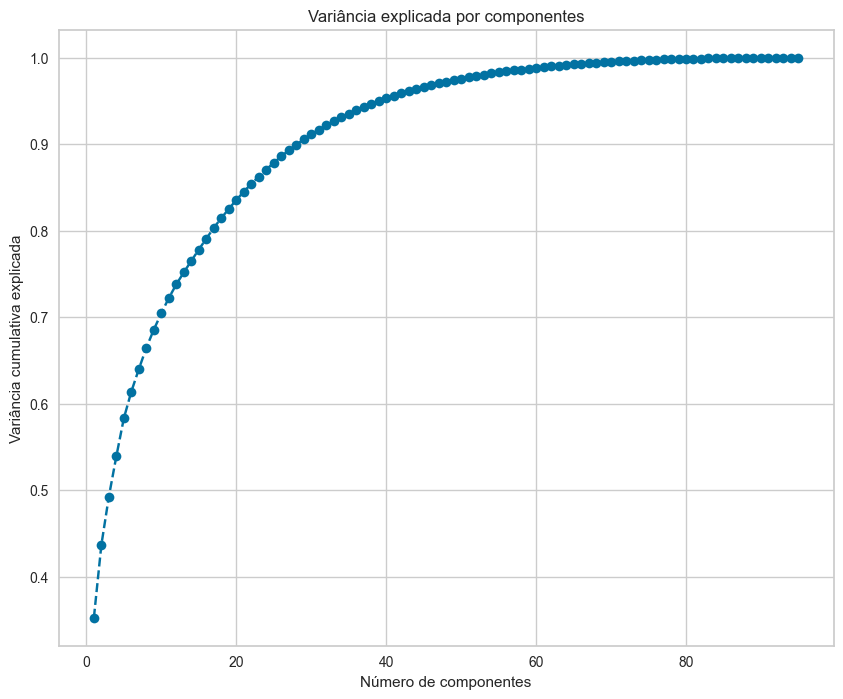

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 96), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Variância explicada por componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Variância cumulativa explicada")

#### Aqui

In [7]:
def plotar_grafico(sum_of_squares, numero_componentes):
    plt.figure(figsize = (10, 8))
    plt.plot(range(1, 21), sum_of_squares, marker = 'o', linestyle = '--')
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    plt.title("K-means with PCA clustering - componentes: " + str(numero_componentes))


C:\Users\thami\AppData\Local\Temp\ipykernel_27440\3663375479.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 8))


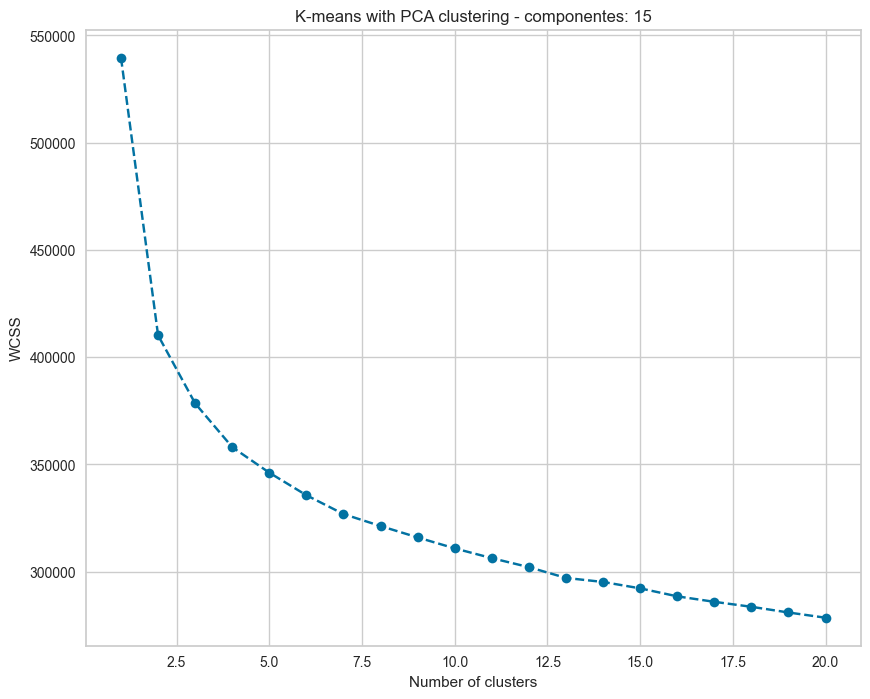

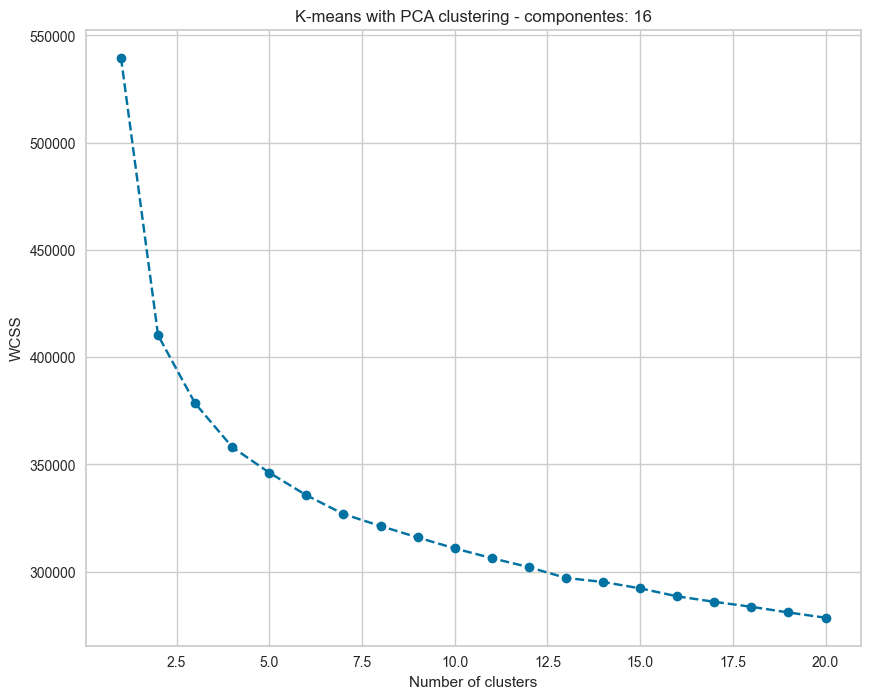

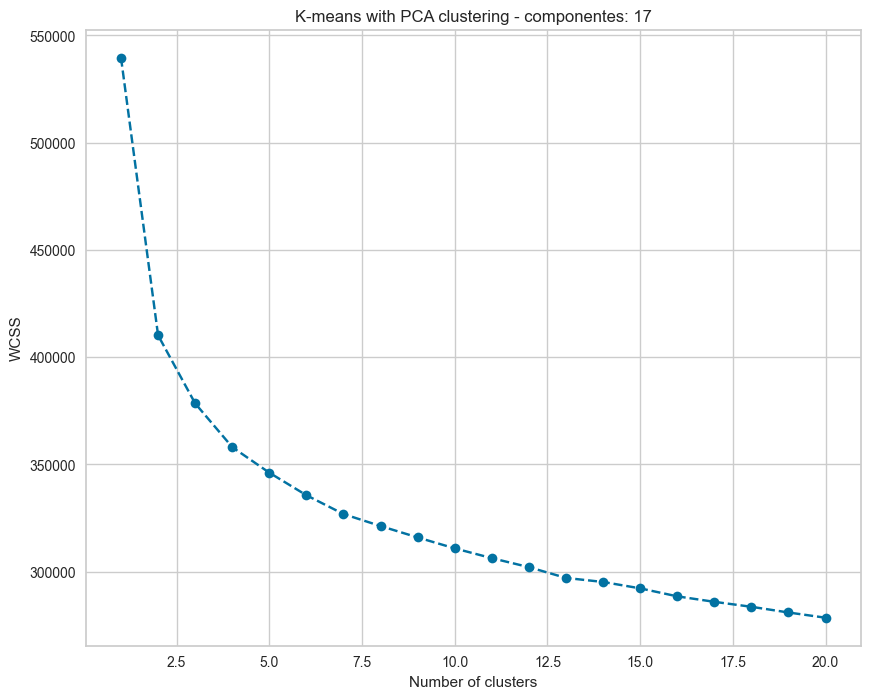

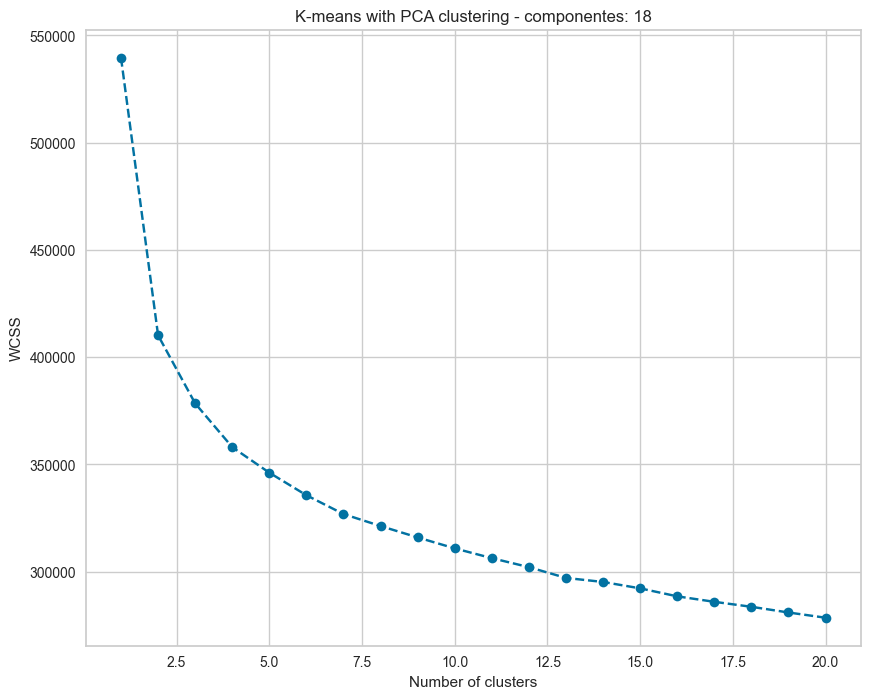

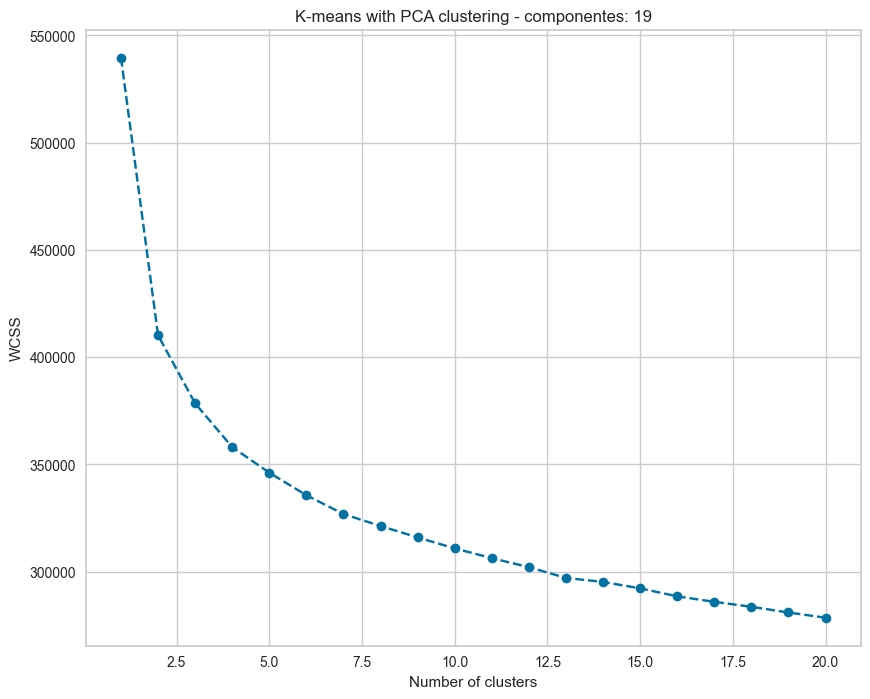

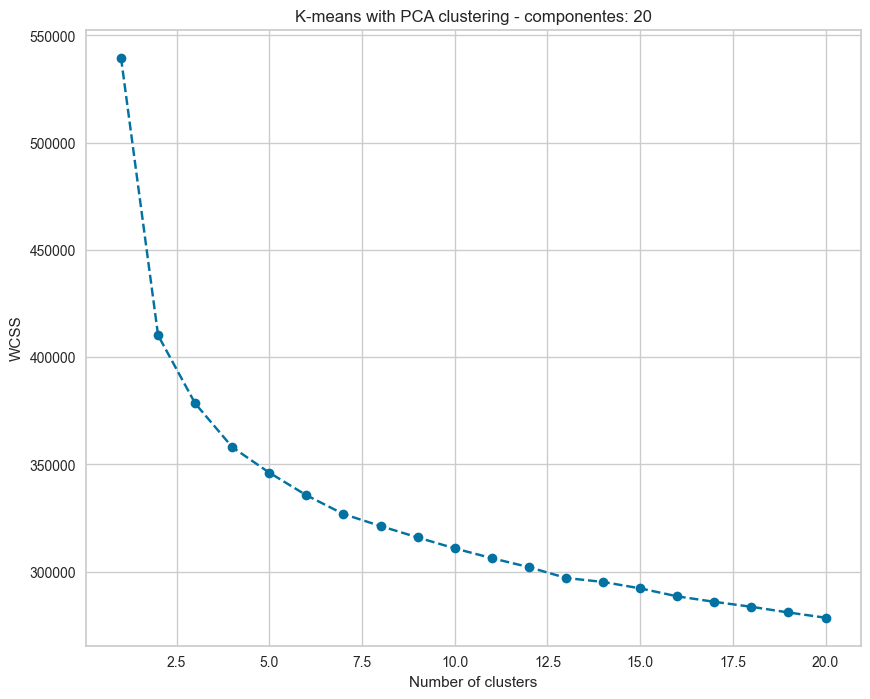

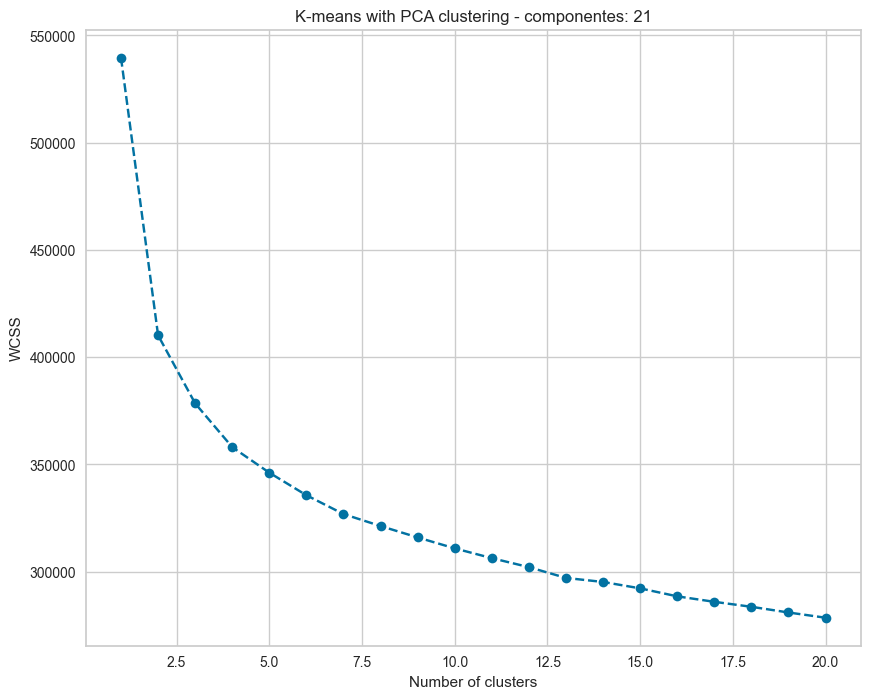

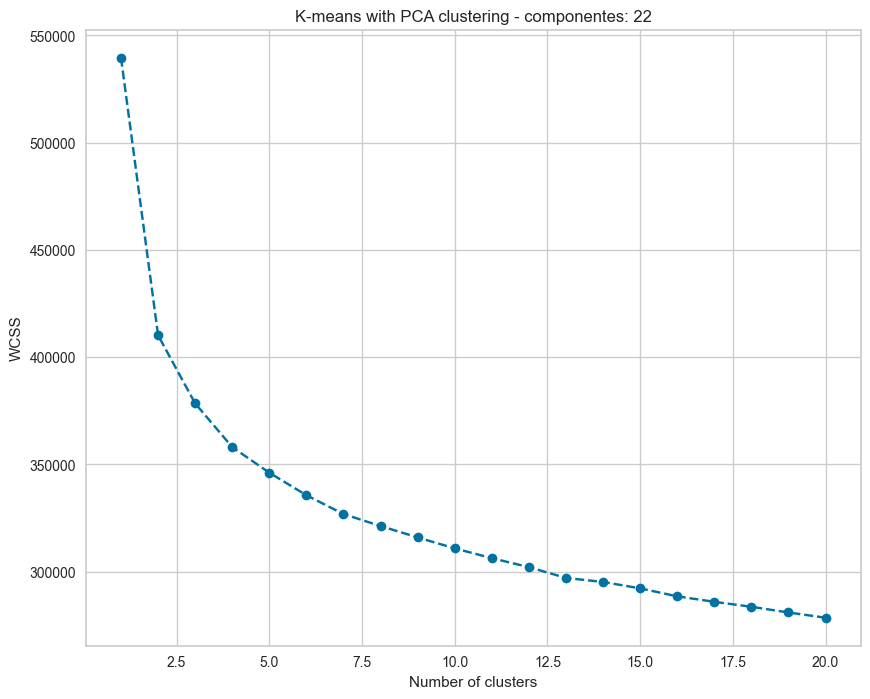

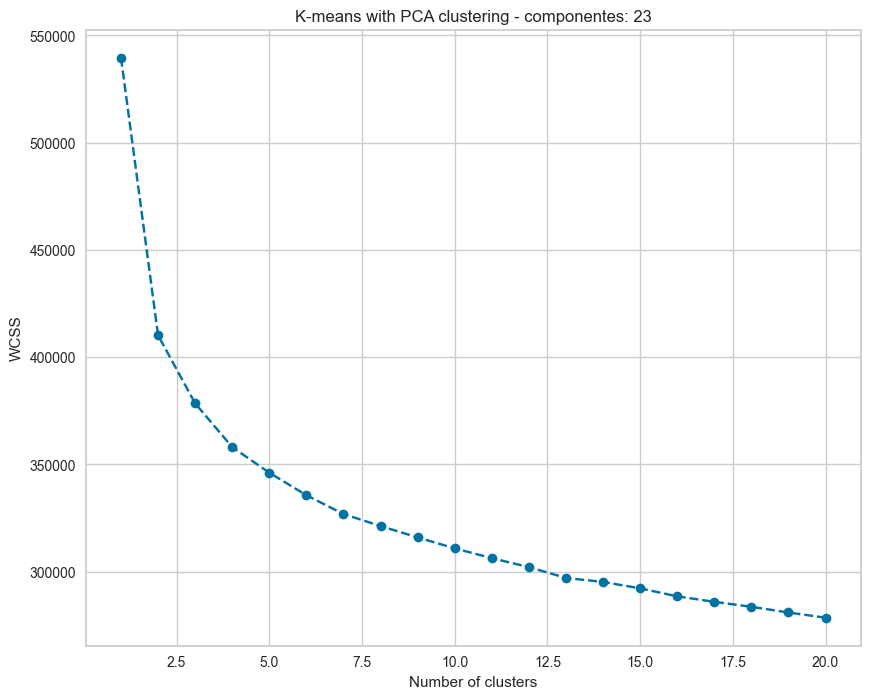

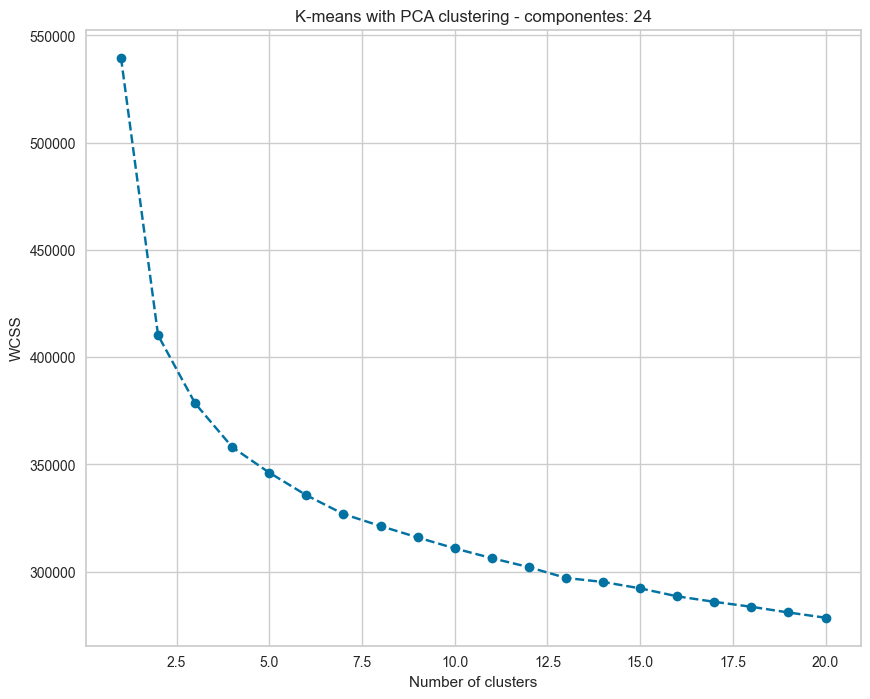

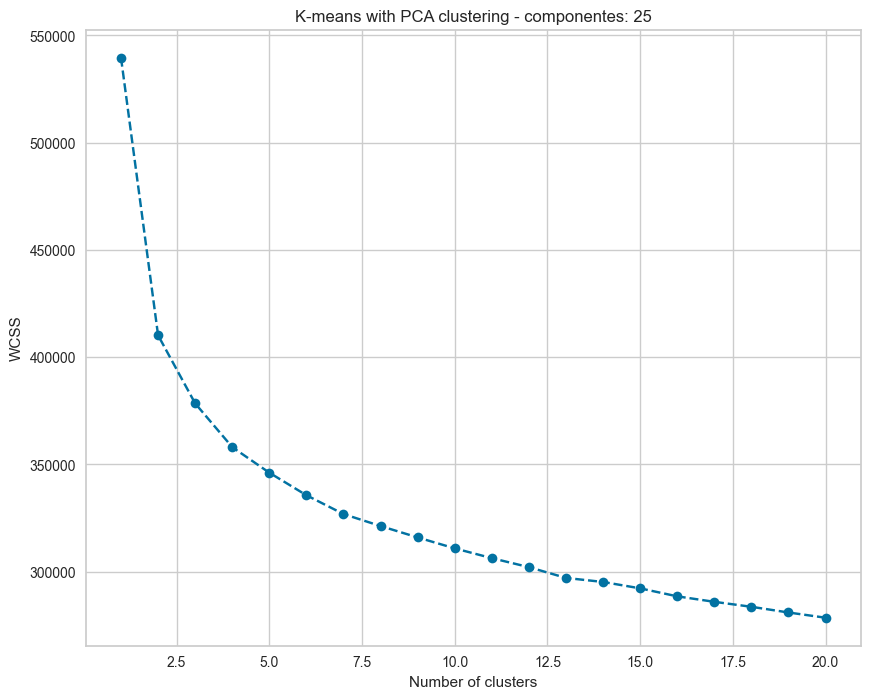

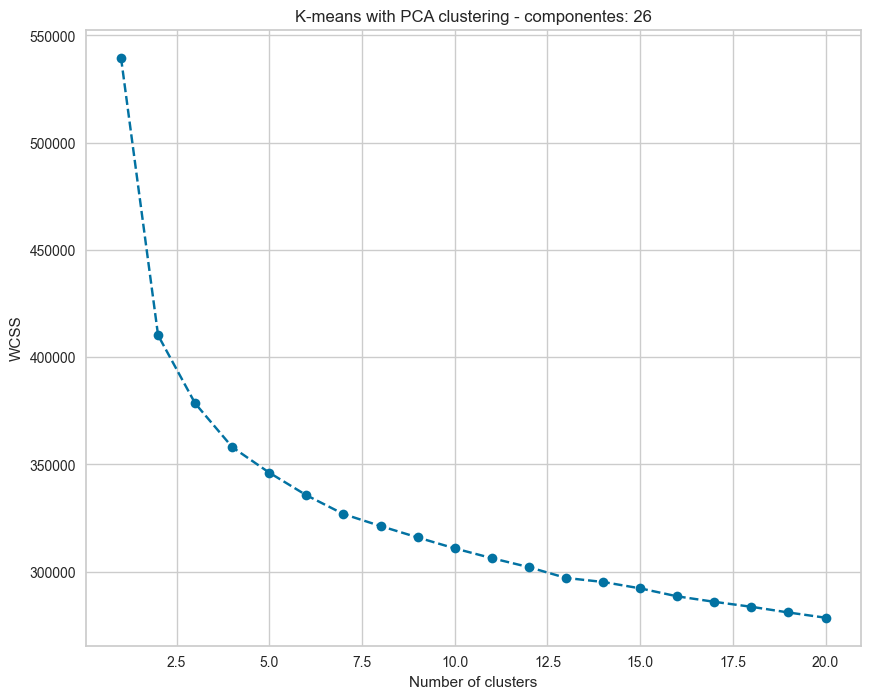

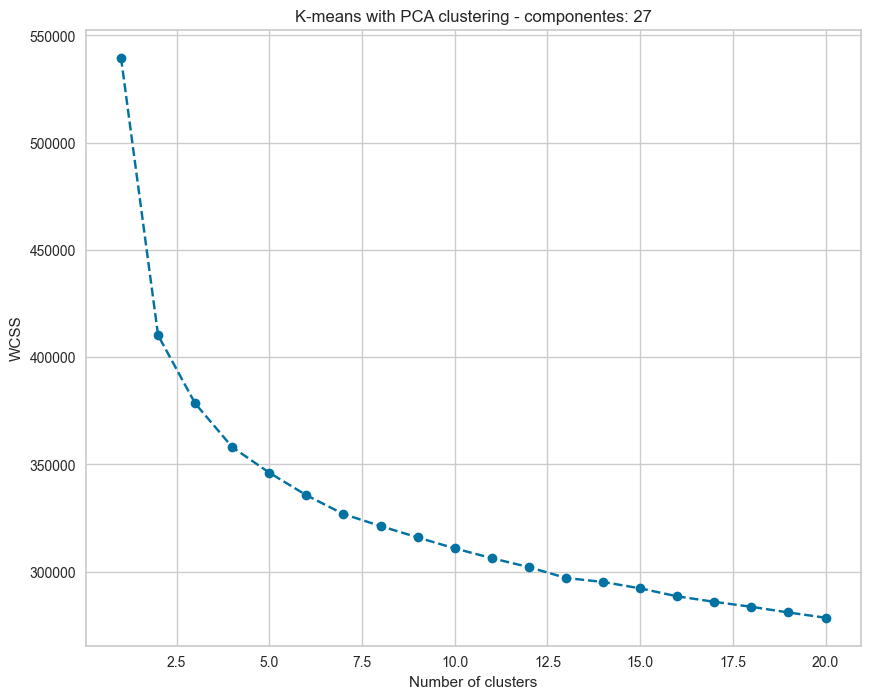

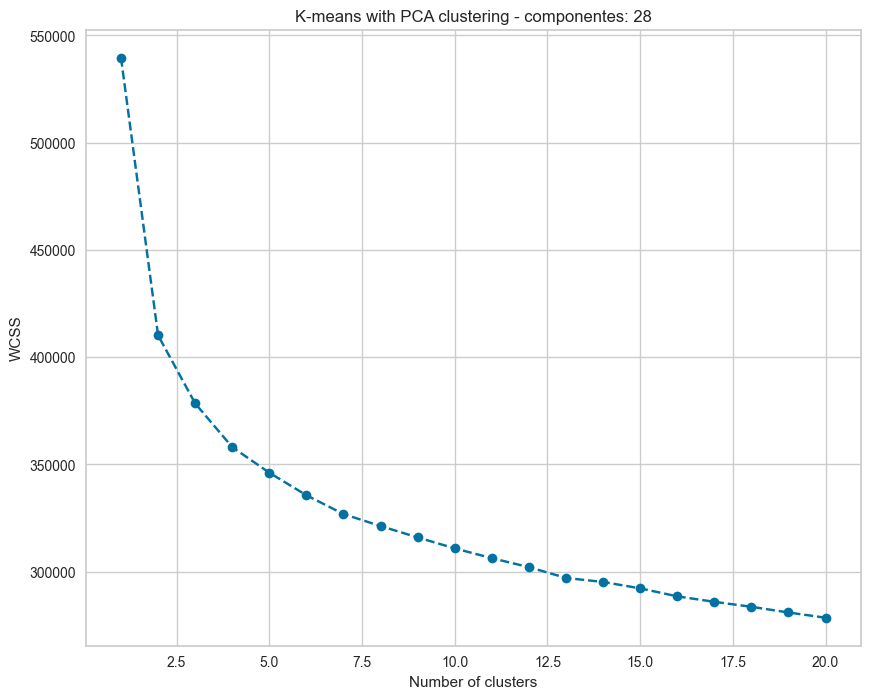

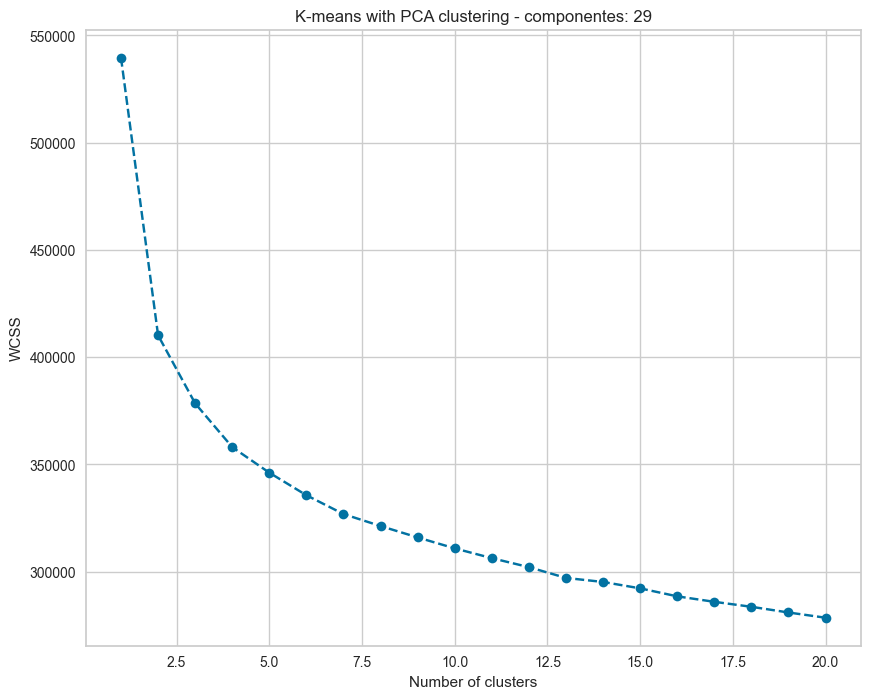

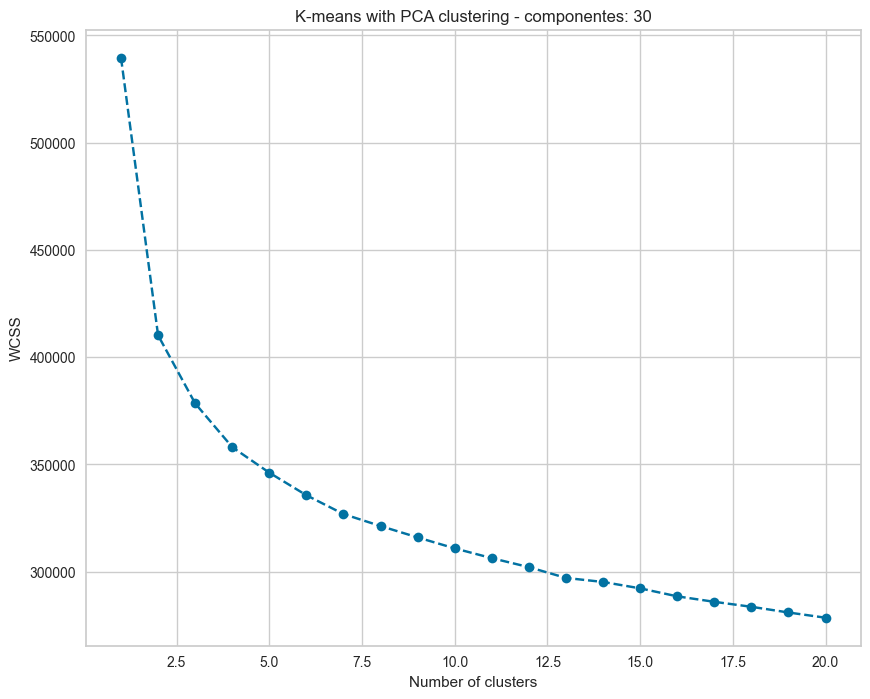

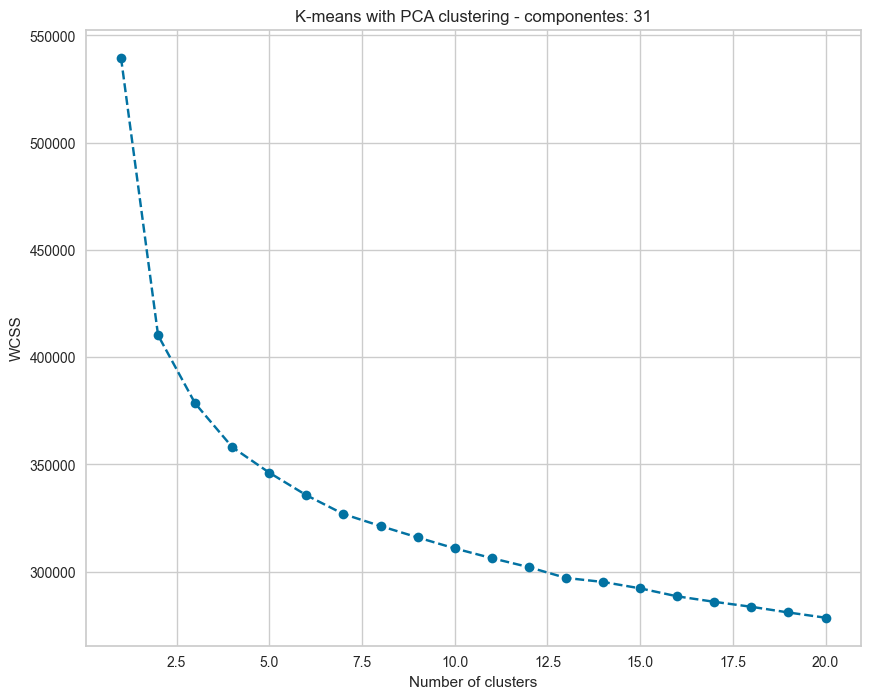

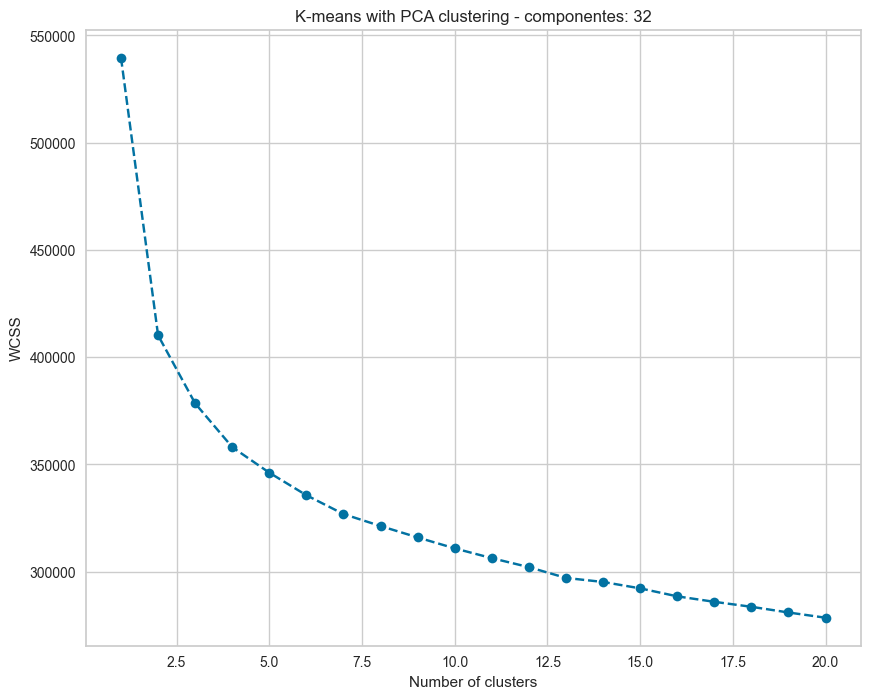

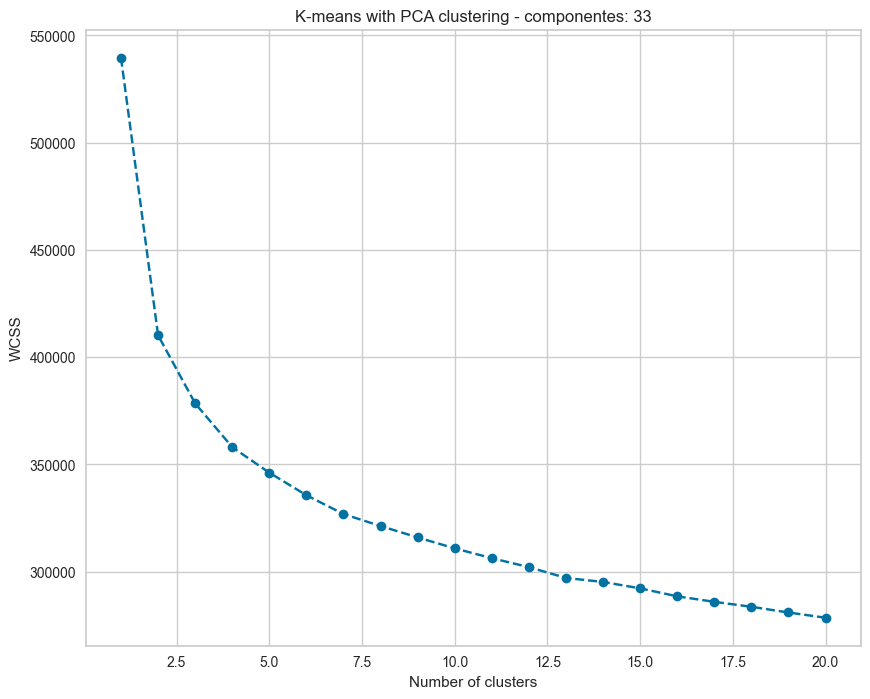

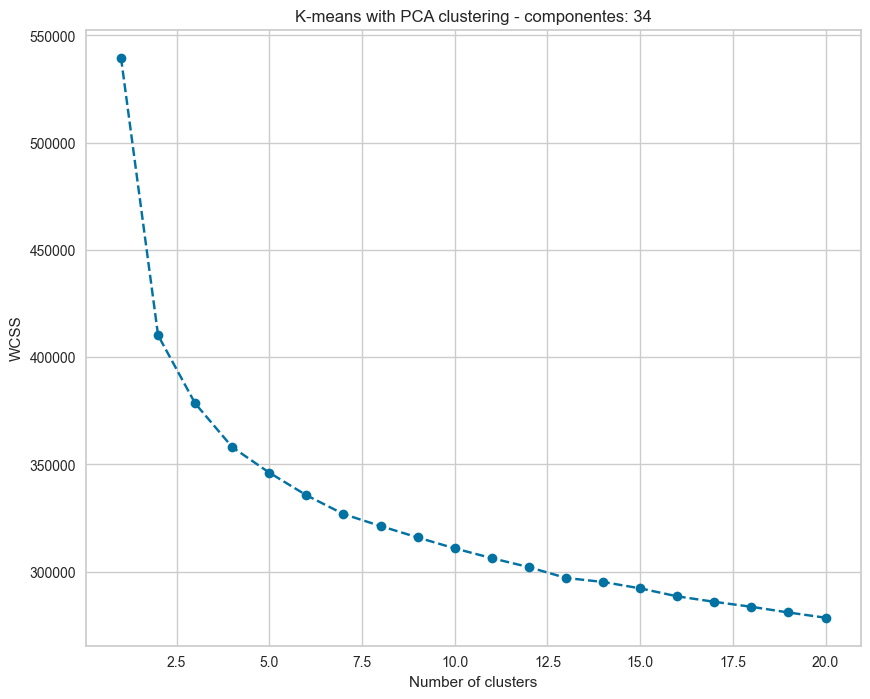

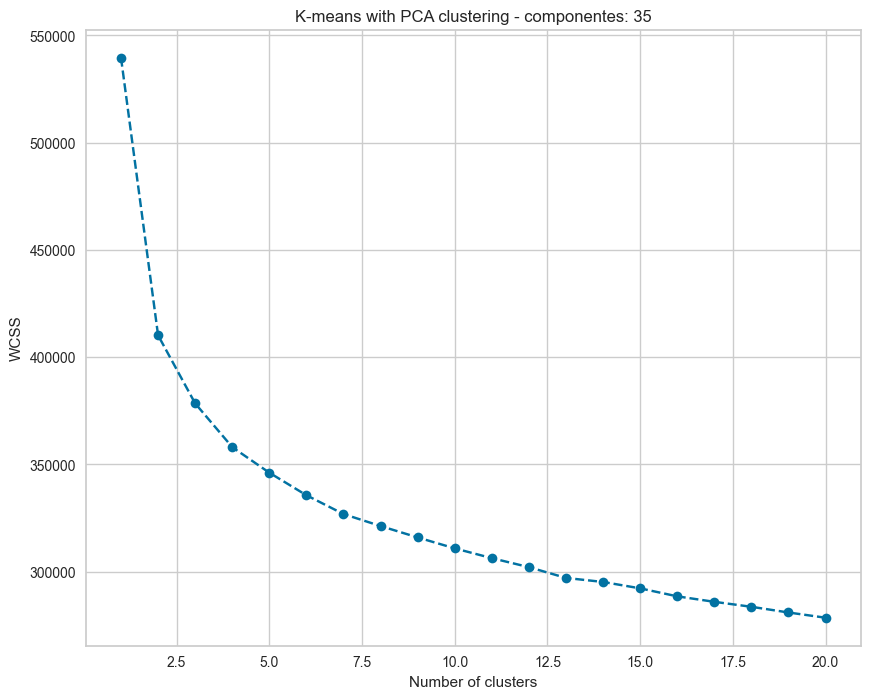

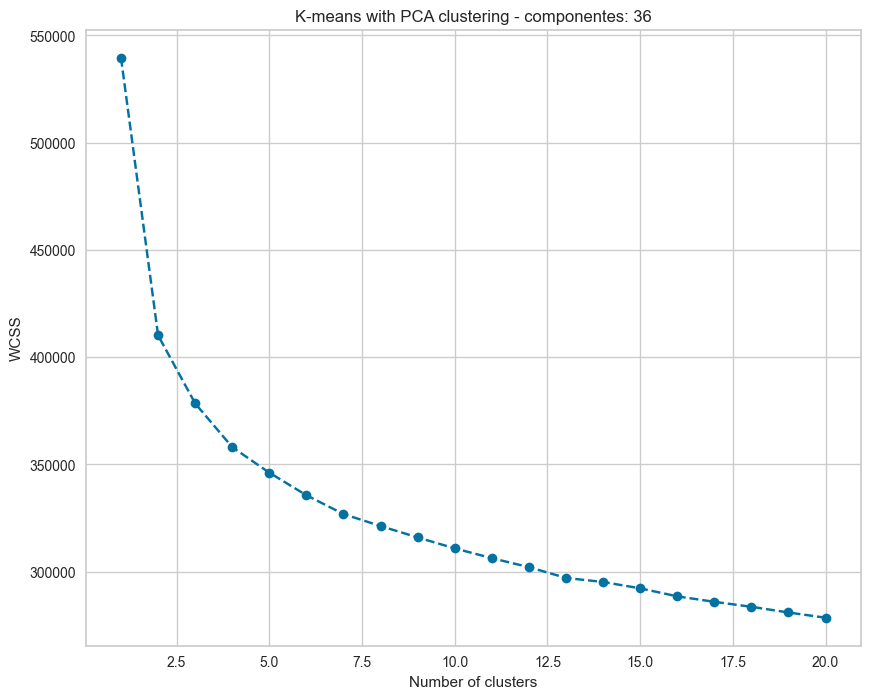

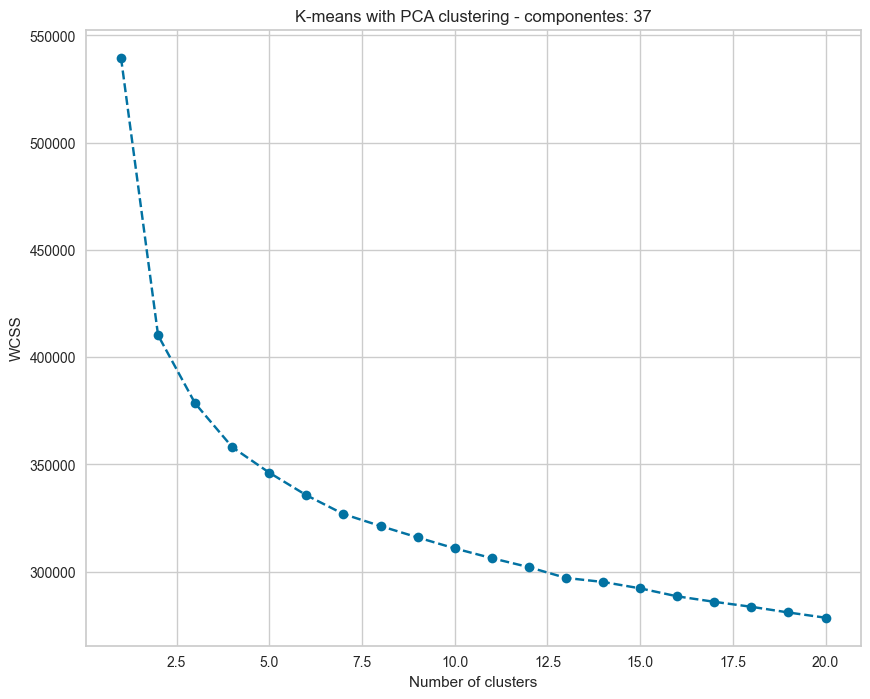

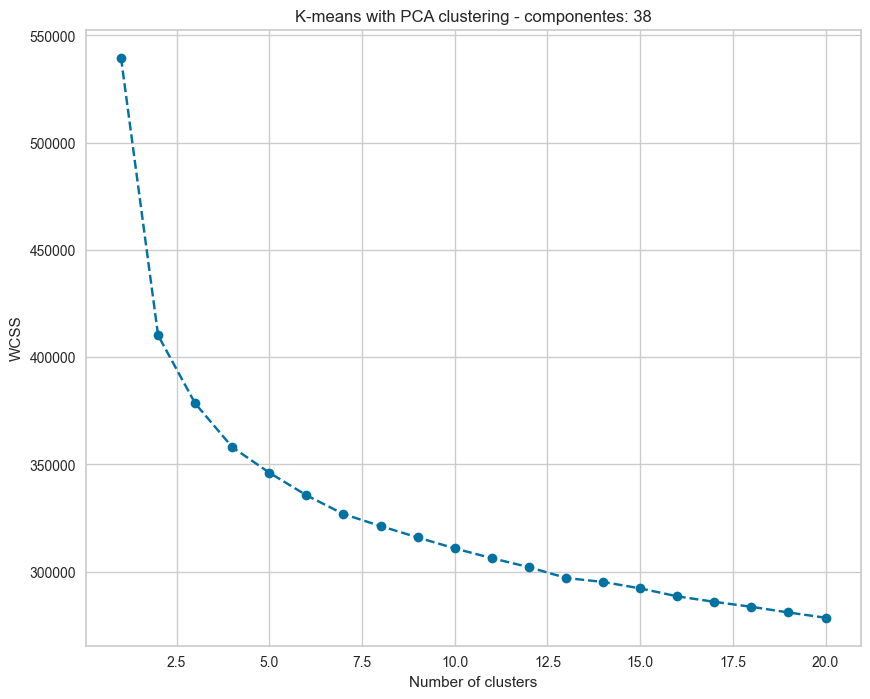

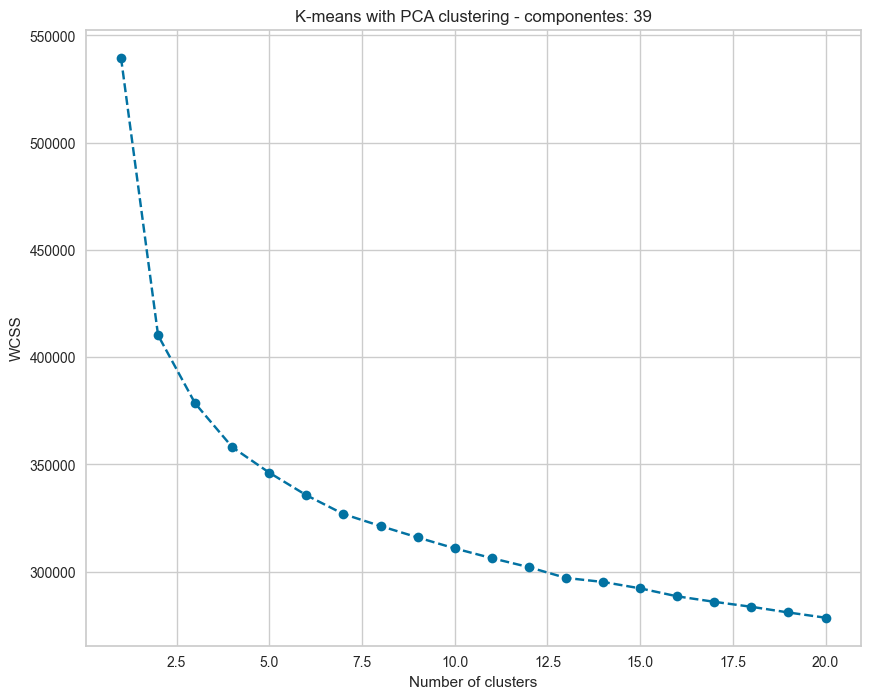

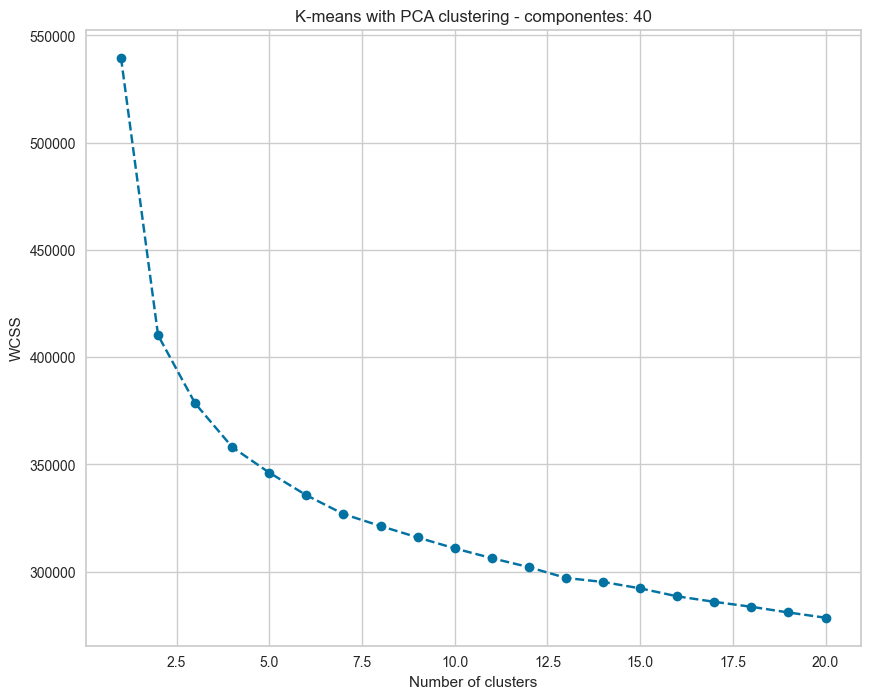

In [8]:
#loop número de componentes
for i in range(15, 41):
    pca_atual = PCA(n_components=i)
    pca_atual.fit(df_scaled)
    pca.transform(df_scaled)
    scores_pca_atual = pca.transform(df_scaled)

    wcss = []
    for k in range(1, 21):
        kmeans_pca = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
        kmeans_pca.fit(scores_pca_atual)
        wcss.append(kmeans_pca.inertia_)

    plotar_grafico(wcss, i)

In [9]:
def criar_pca(numero_componentes):
    pca = PCA(n_components=numero_componentes)
    pca.fit(df_scaled)
    scores_pca = pca.transform(df_scaled)

    return scores_pca

In [10]:
def plotar_analise_silhueta(n_clusters, scores_pca, numero_componentes):
    print("Número de componentes utilizado " + str(numero_componentes))
    print()
    kmeans_pca = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    visualizer = SilhouetteVisualizer(kmeans_pca)
    visualizer.fit(scores_pca)
    visualizer.show()

Número de componentes utilizado 15



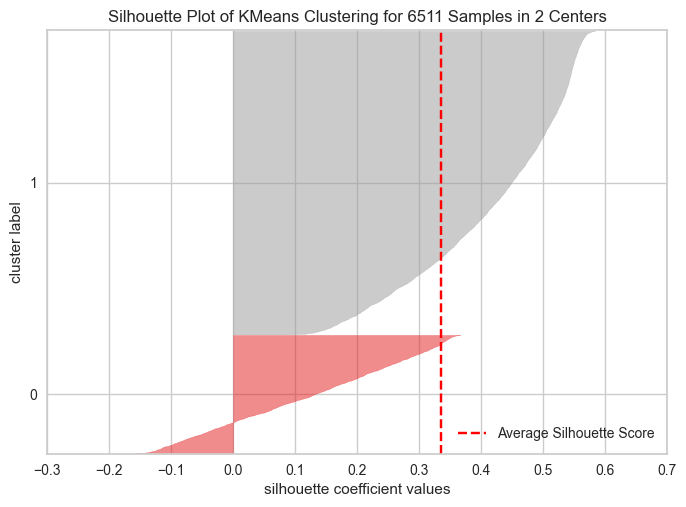

Número de componentes utilizado 15



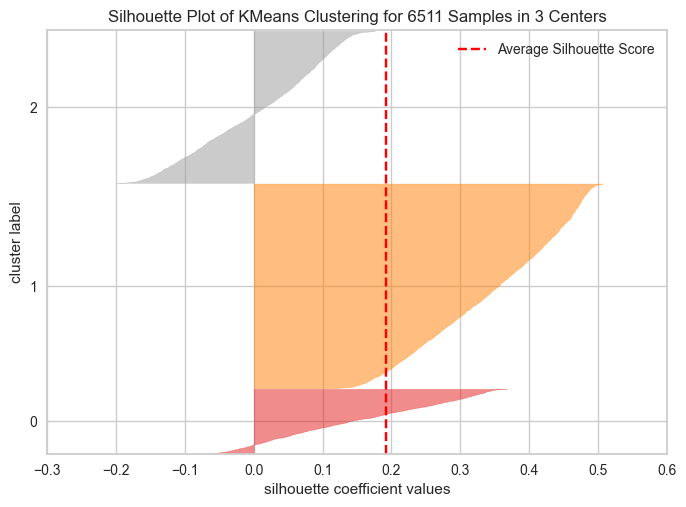

Número de componentes utilizado 15



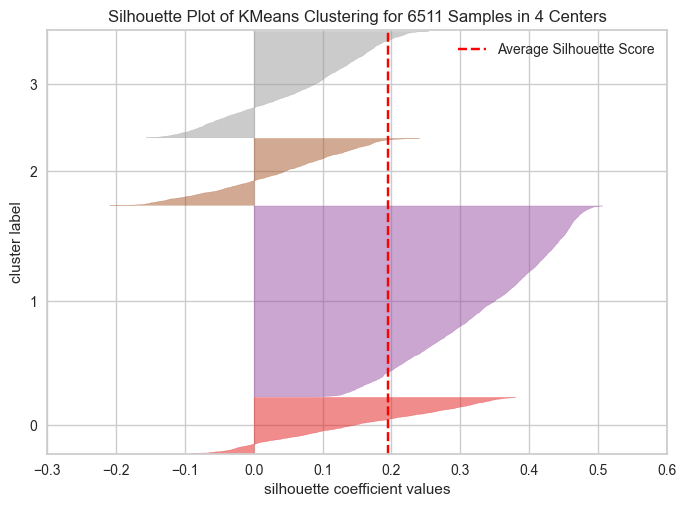

Número de componentes utilizado 15



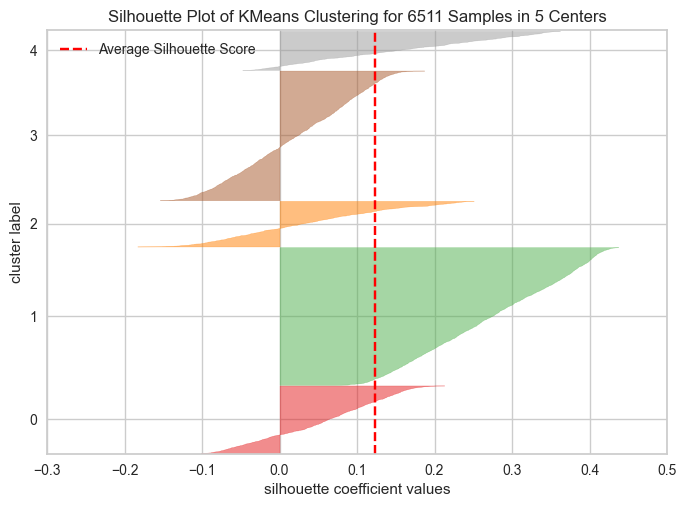

Número de componentes utilizado 15



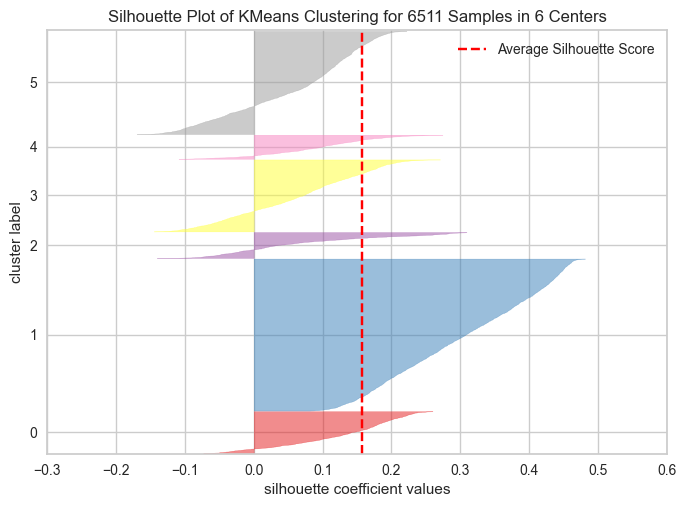

Número de componentes utilizado 16



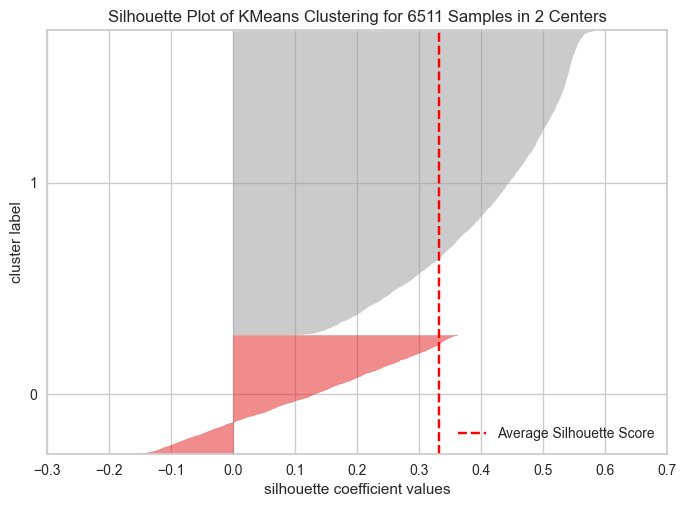

Número de componentes utilizado 16



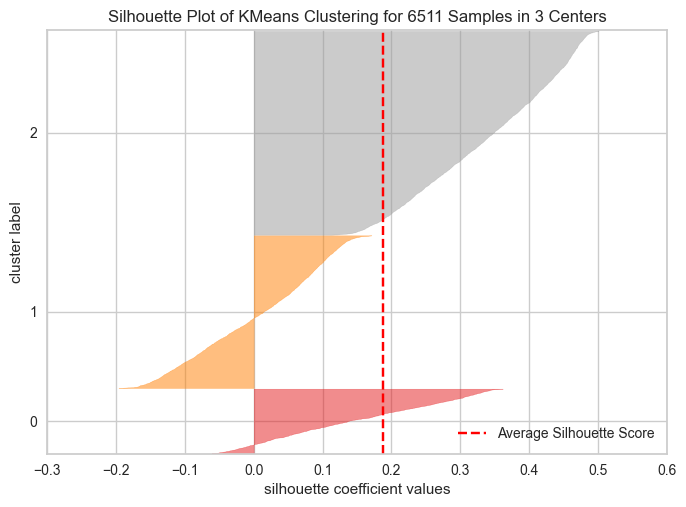

Número de componentes utilizado 16



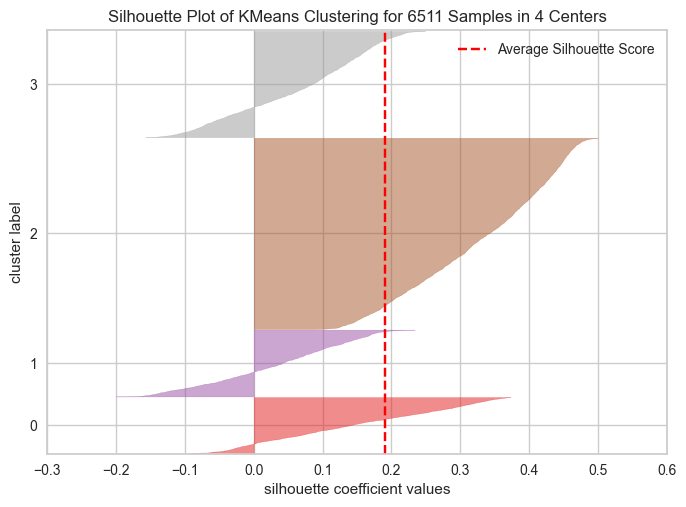

Número de componentes utilizado 16



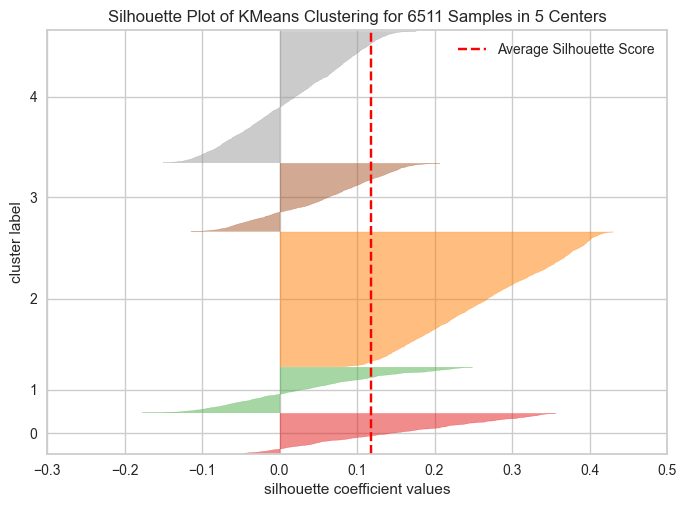

Número de componentes utilizado 16



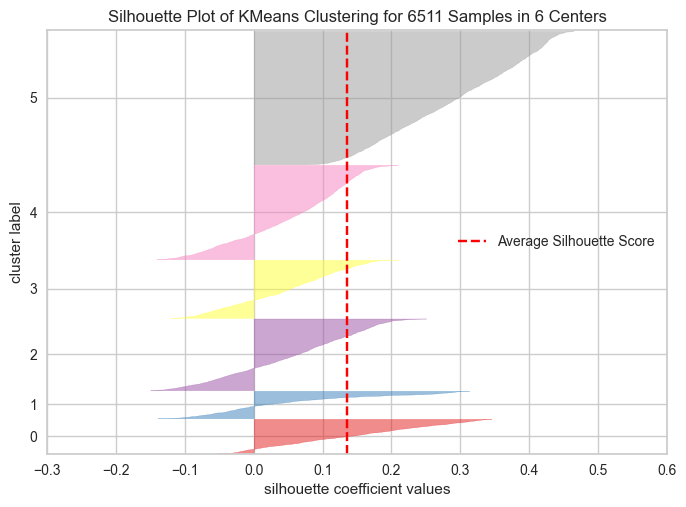

Número de componentes utilizado 17



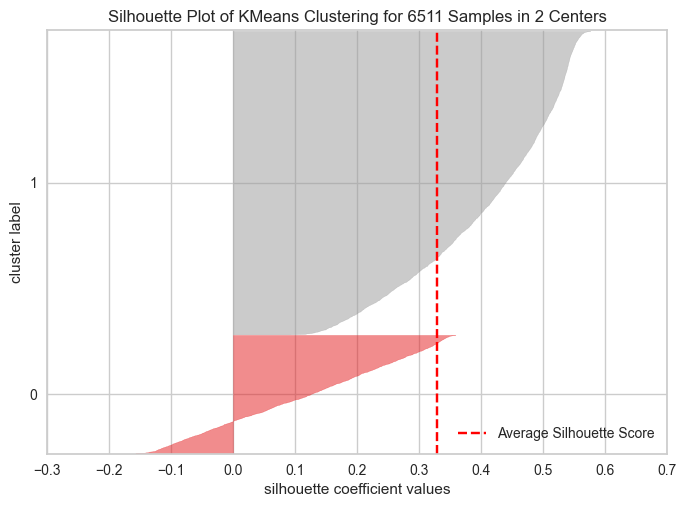

Número de componentes utilizado 17



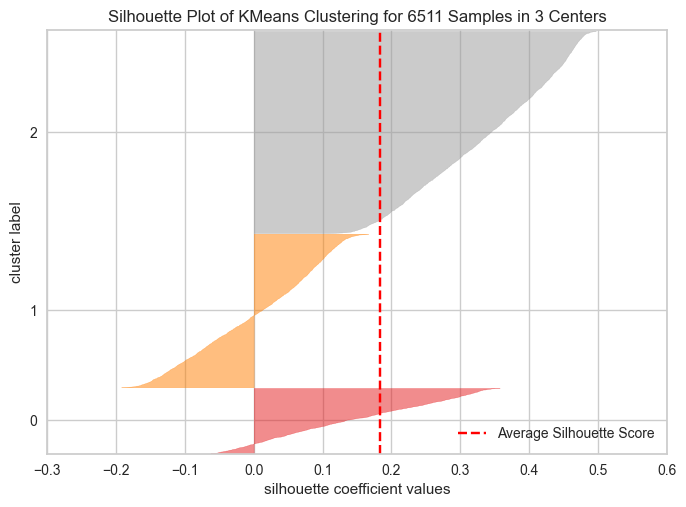

Número de componentes utilizado 17



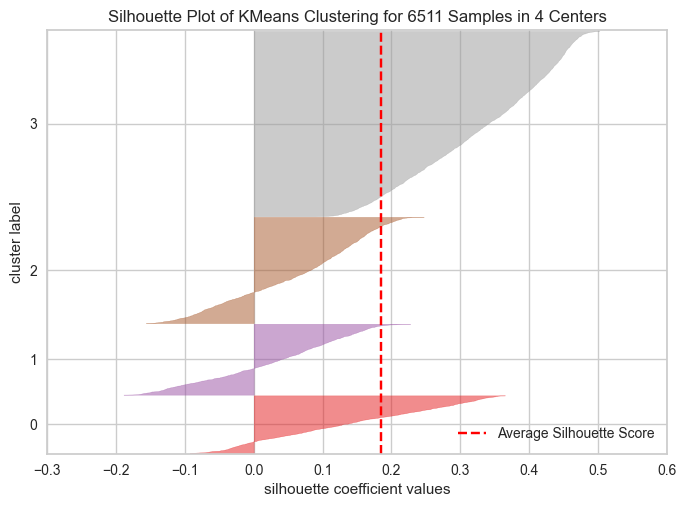

Número de componentes utilizado 17



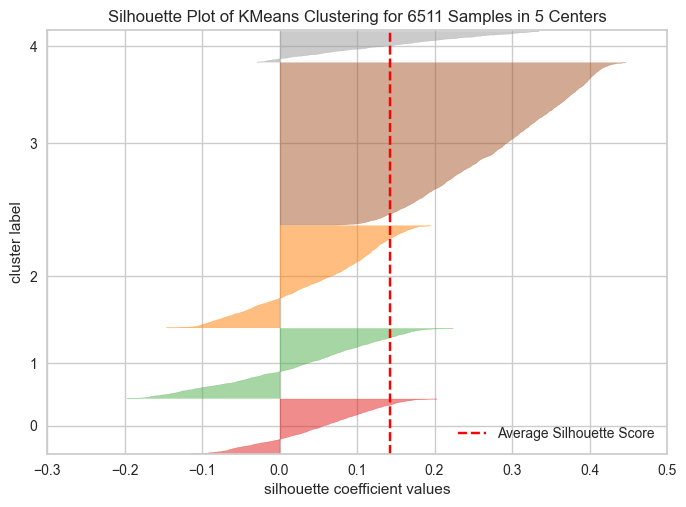

Número de componentes utilizado 17



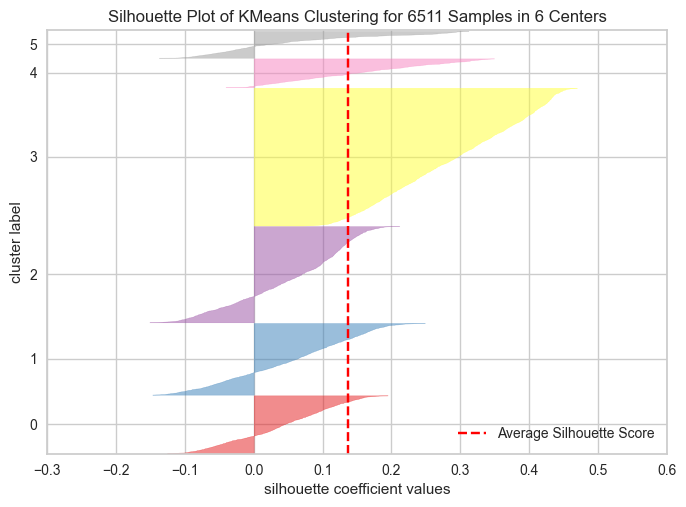

Número de componentes utilizado 18



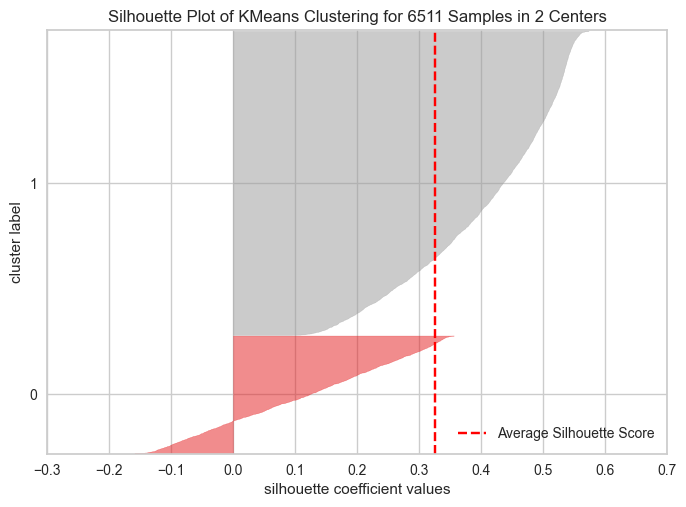

Número de componentes utilizado 18



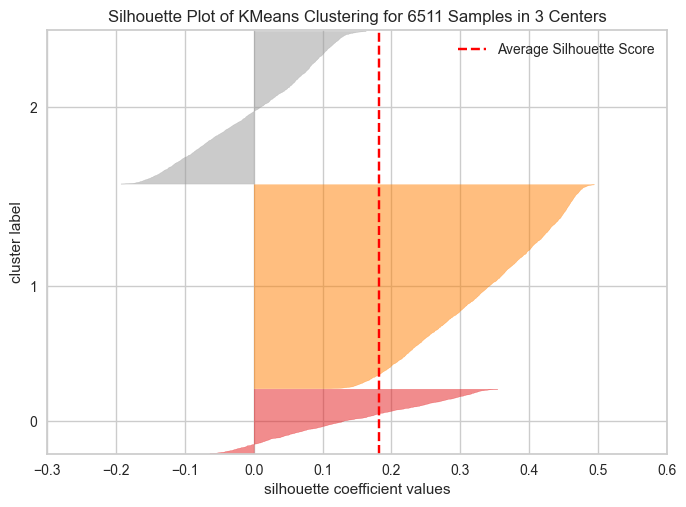

Número de componentes utilizado 18



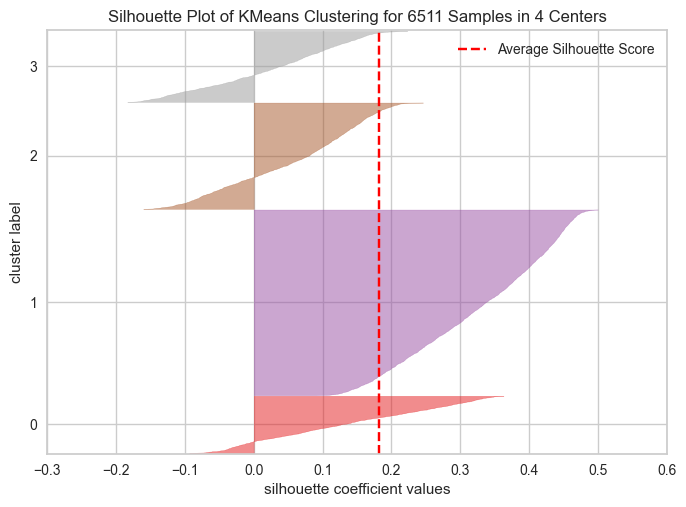

Número de componentes utilizado 18



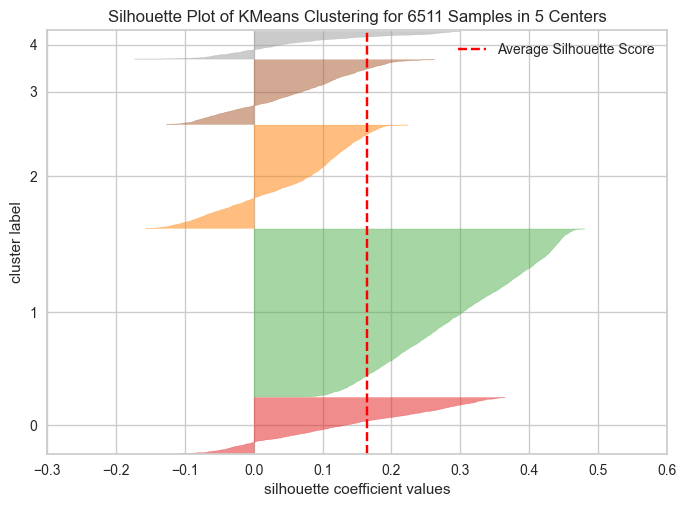

Número de componentes utilizado 18



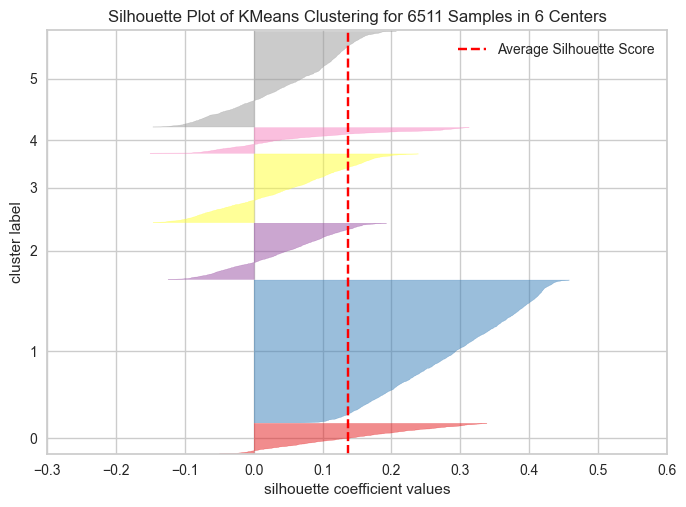

Número de componentes utilizado 19



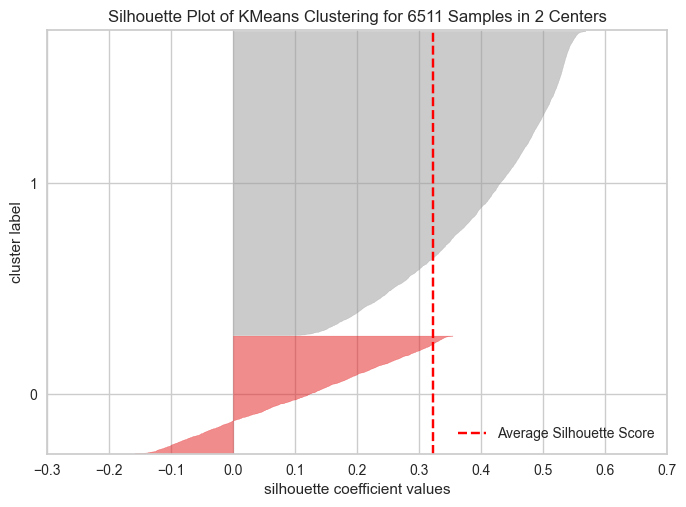

Número de componentes utilizado 19



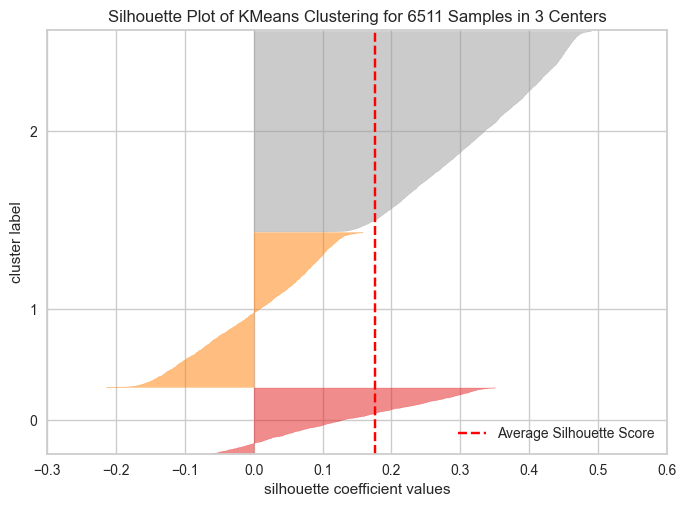

Número de componentes utilizado 19



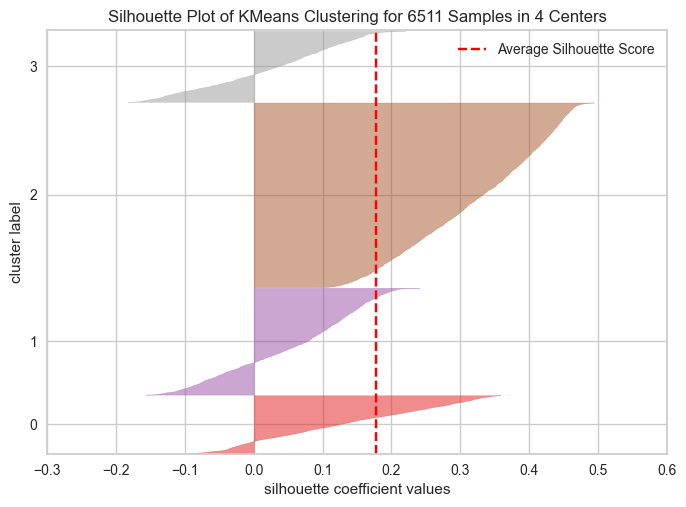

Número de componentes utilizado 19



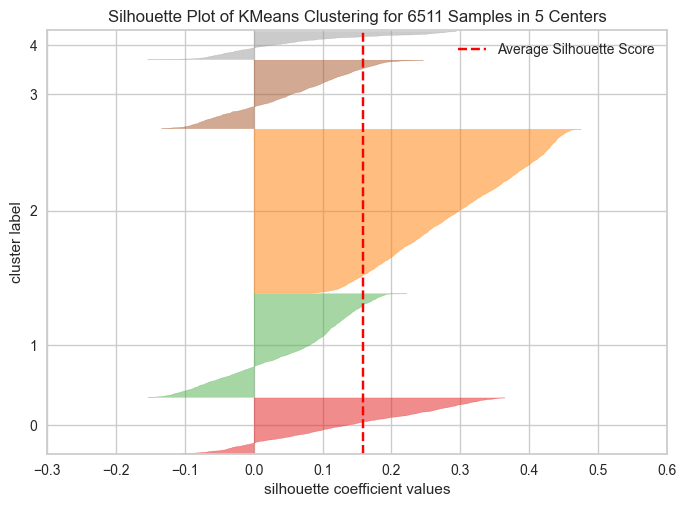

Número de componentes utilizado 19



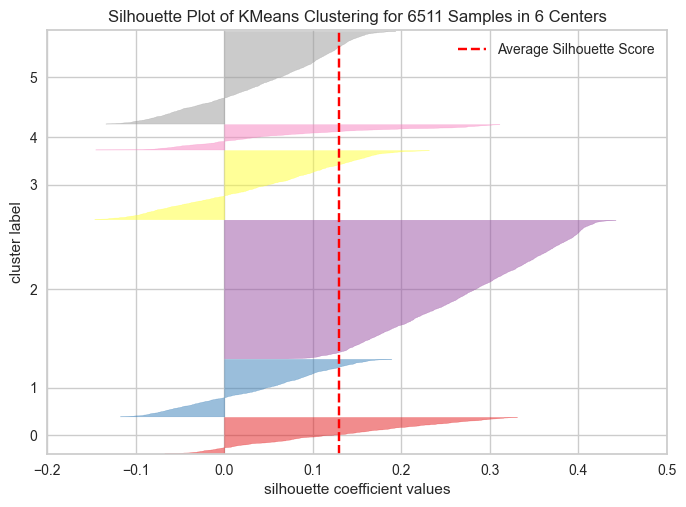

Número de componentes utilizado 20



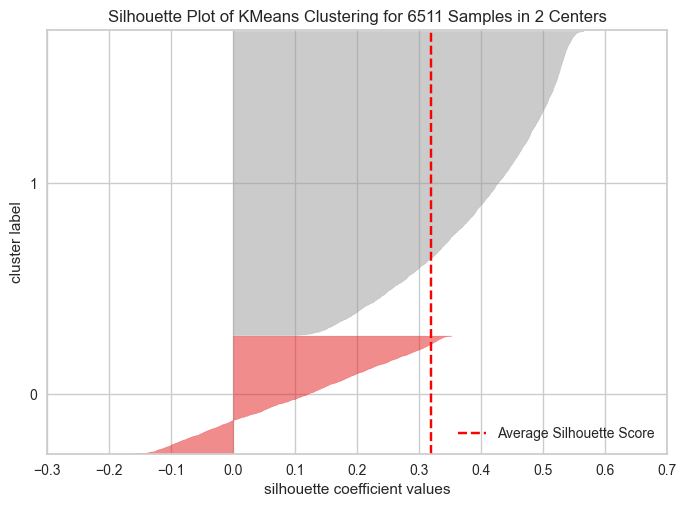

Número de componentes utilizado 20



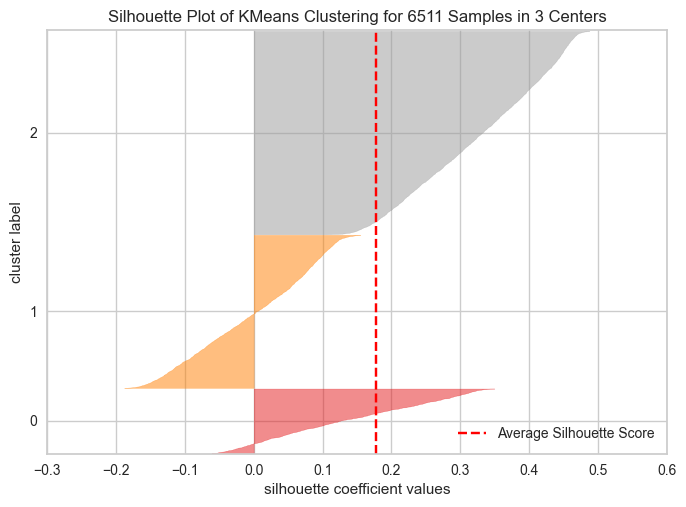

Número de componentes utilizado 20



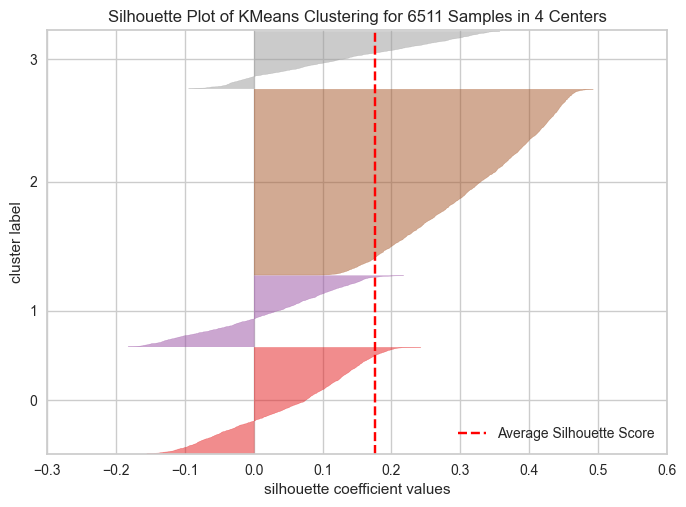

Número de componentes utilizado 20



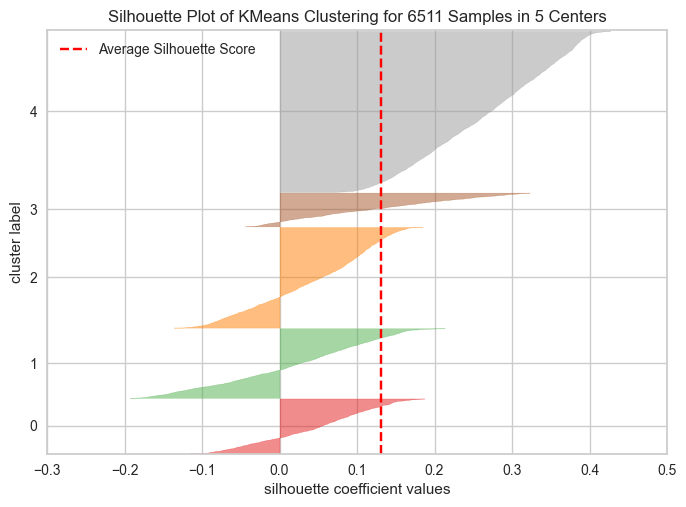

Número de componentes utilizado 20



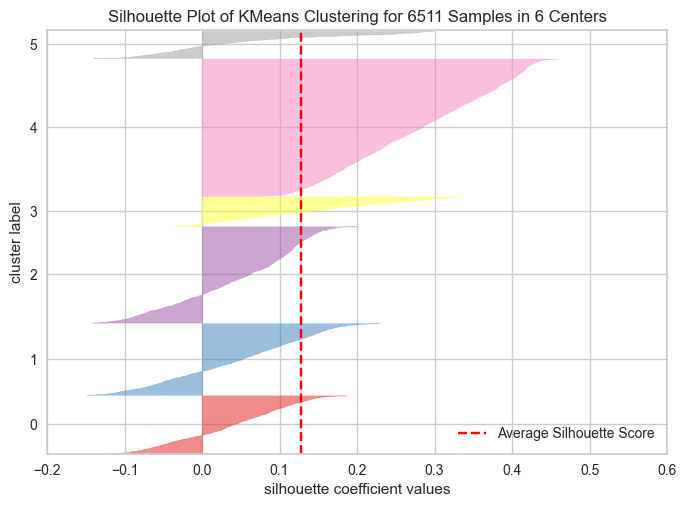

Número de componentes utilizado 21



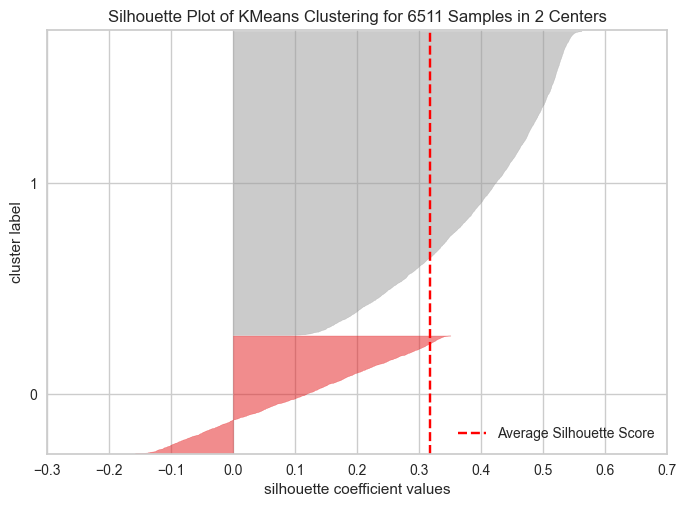

Número de componentes utilizado 21



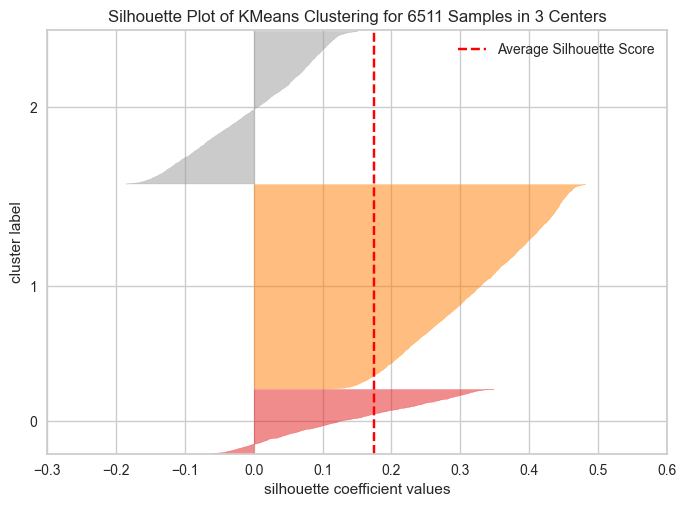

Número de componentes utilizado 21



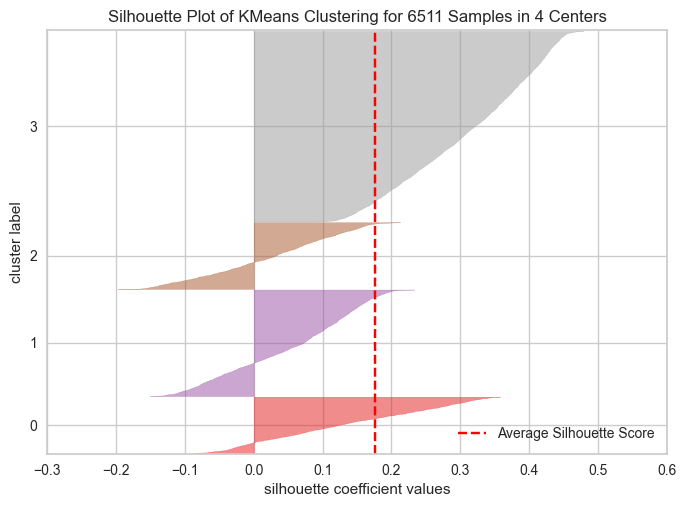

Número de componentes utilizado 21



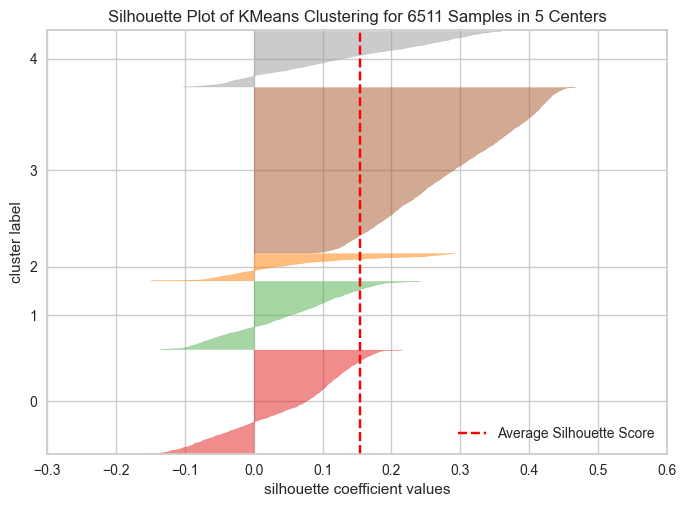

Número de componentes utilizado 21



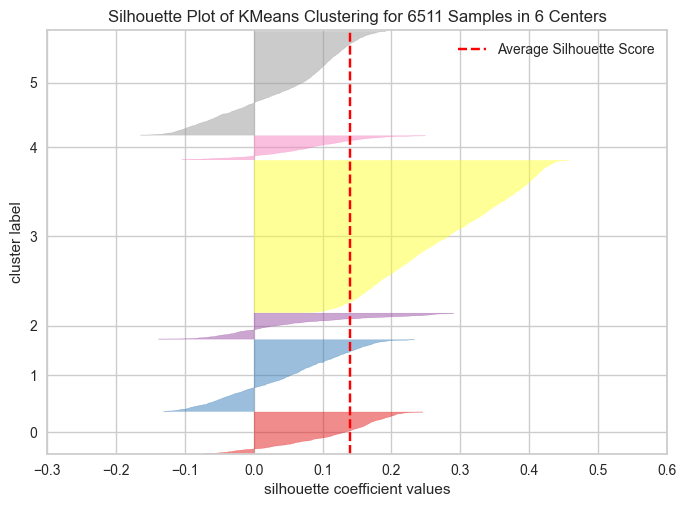

Número de componentes utilizado 22



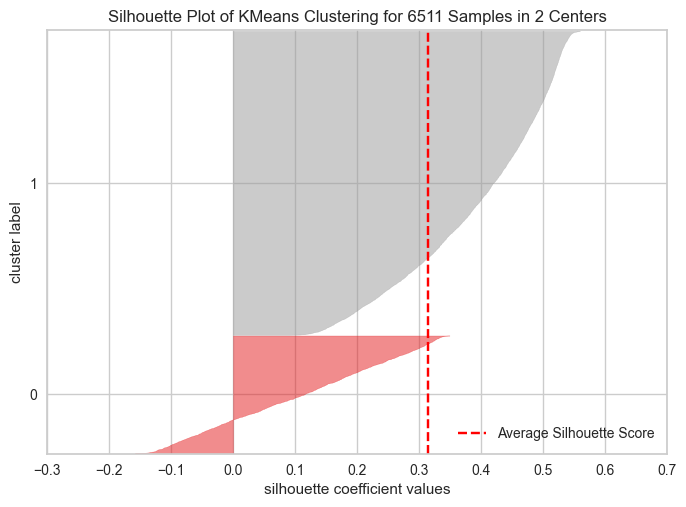

Número de componentes utilizado 22



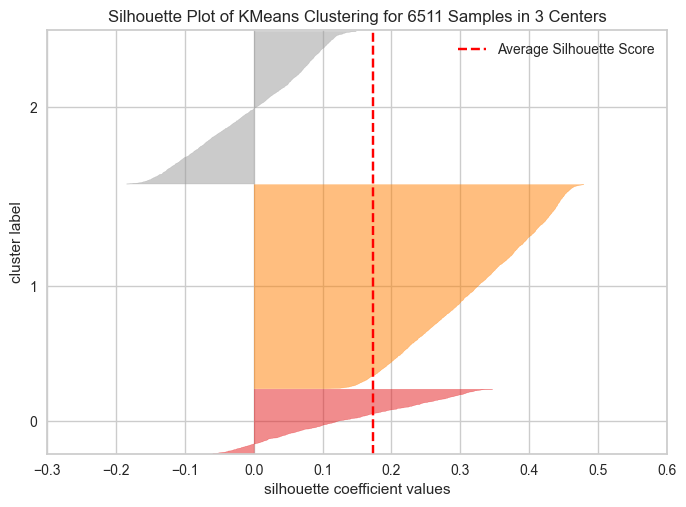

Número de componentes utilizado 22



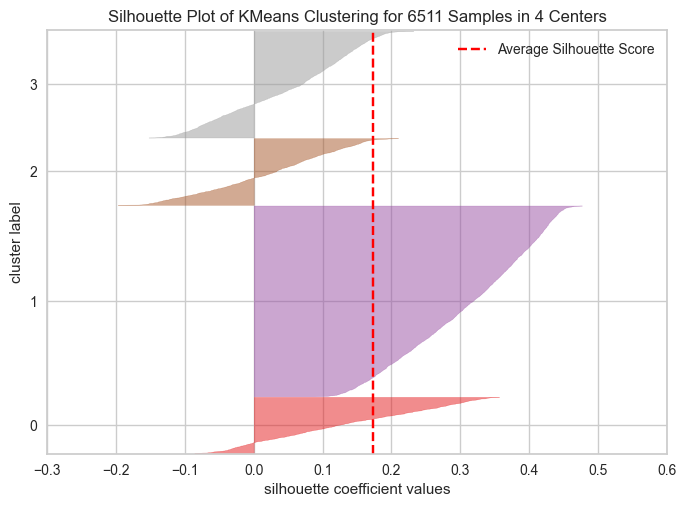

Número de componentes utilizado 22



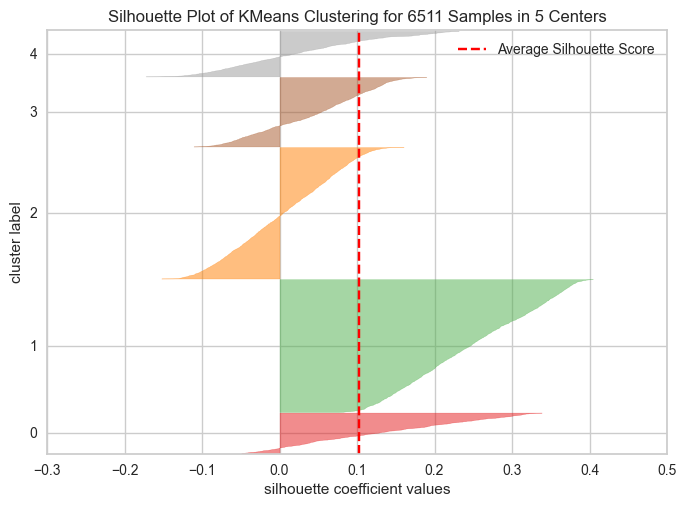

Número de componentes utilizado 22



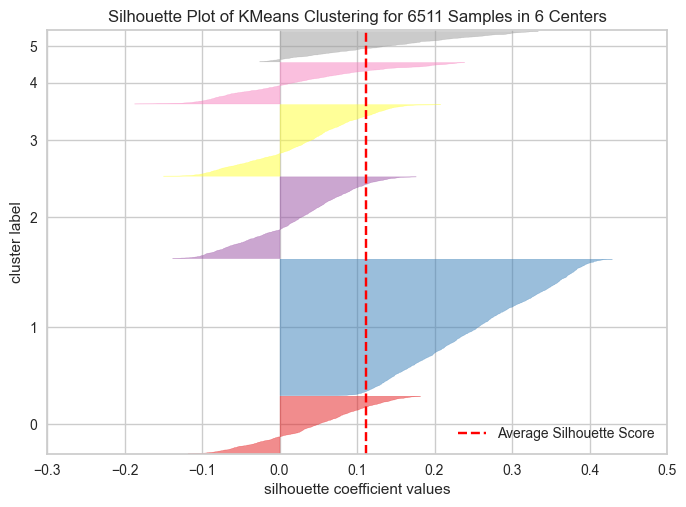

Número de componentes utilizado 23



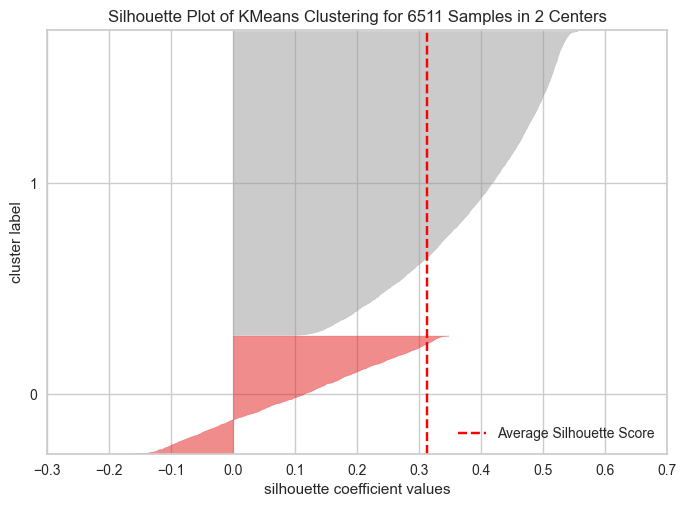

Número de componentes utilizado 23



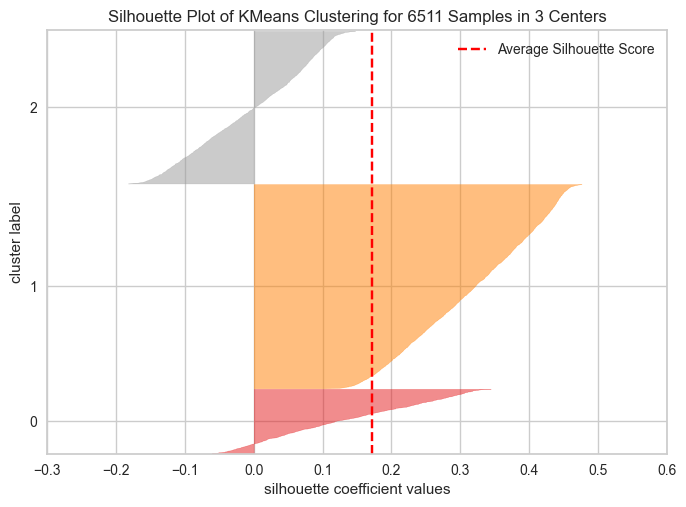

Número de componentes utilizado 23



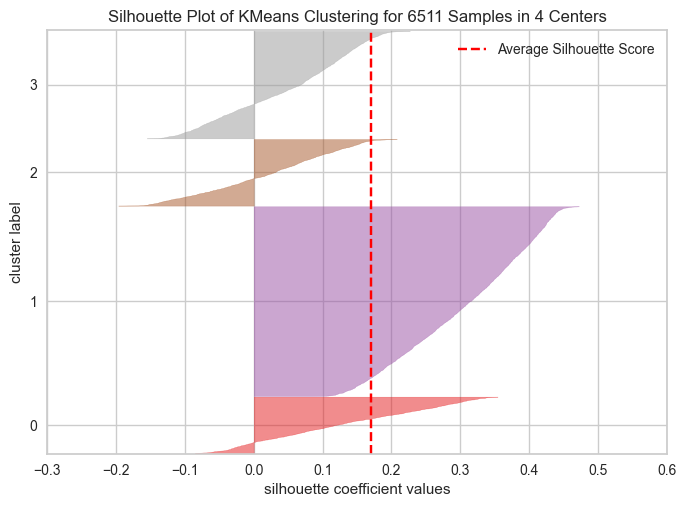

Número de componentes utilizado 23



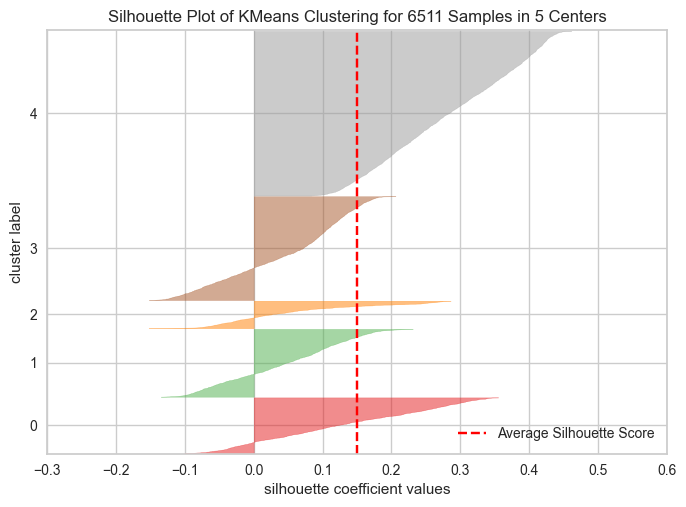

Número de componentes utilizado 23



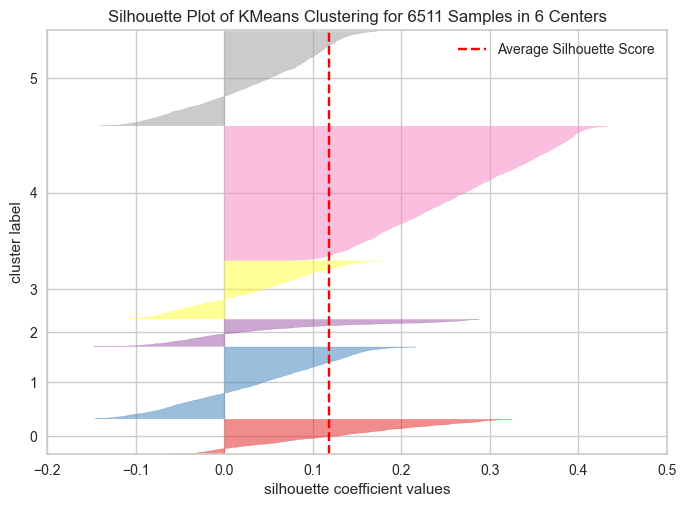

Número de componentes utilizado 24



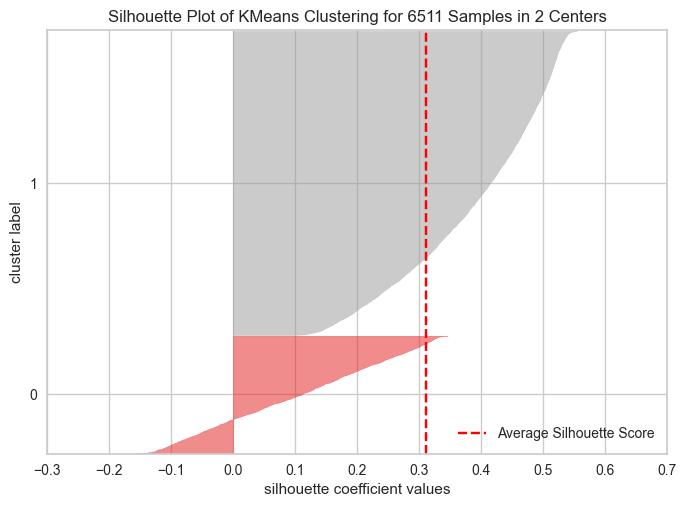

Número de componentes utilizado 24



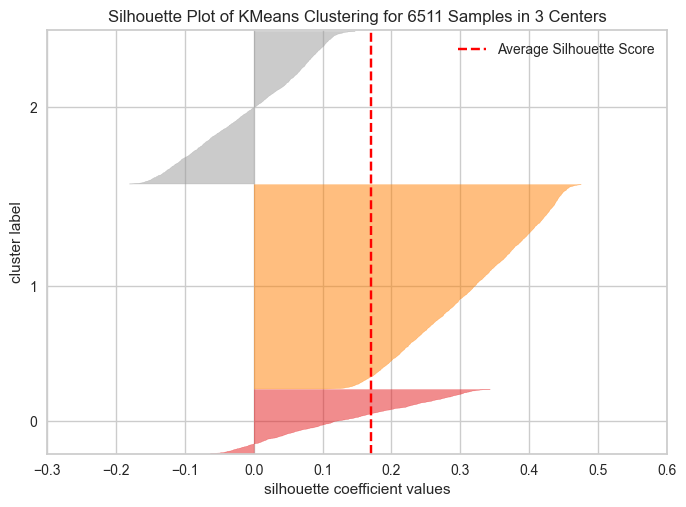

Número de componentes utilizado 24



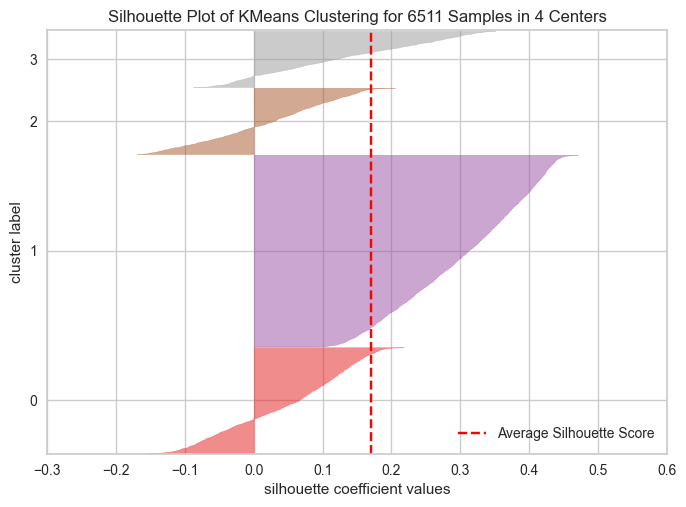

Número de componentes utilizado 24



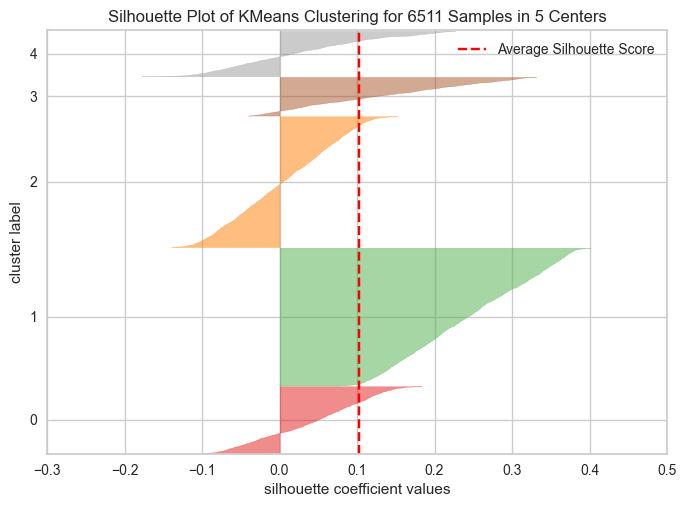

Número de componentes utilizado 24



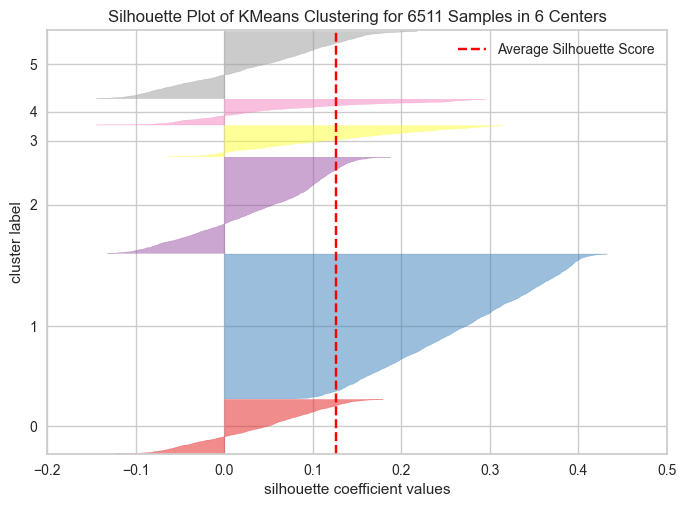

Número de componentes utilizado 25



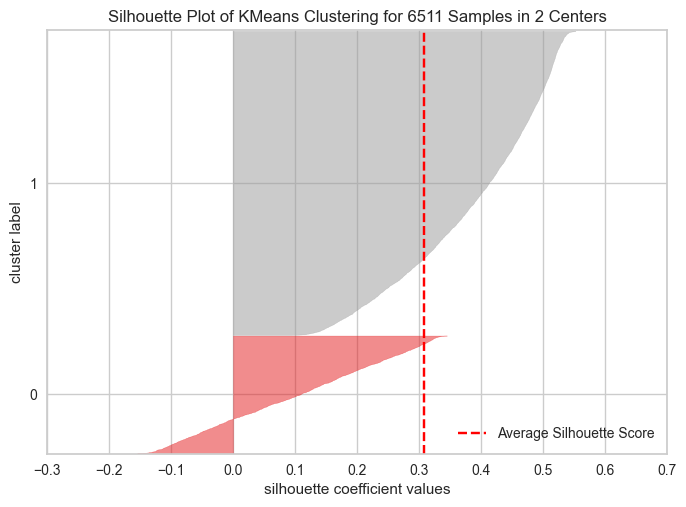

Número de componentes utilizado 25



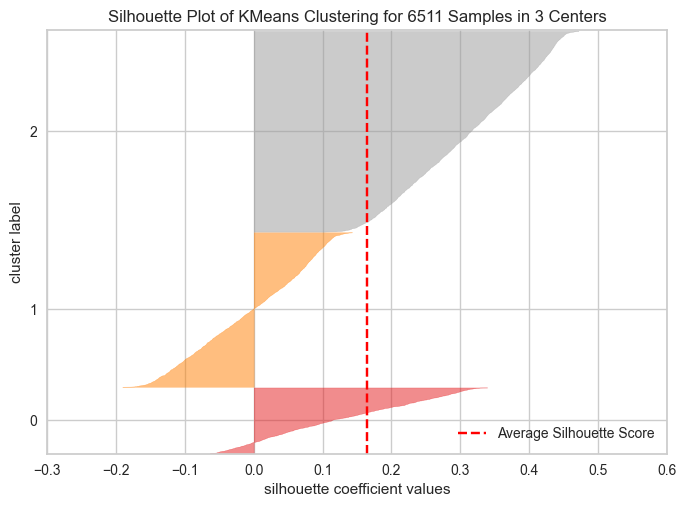

Número de componentes utilizado 25



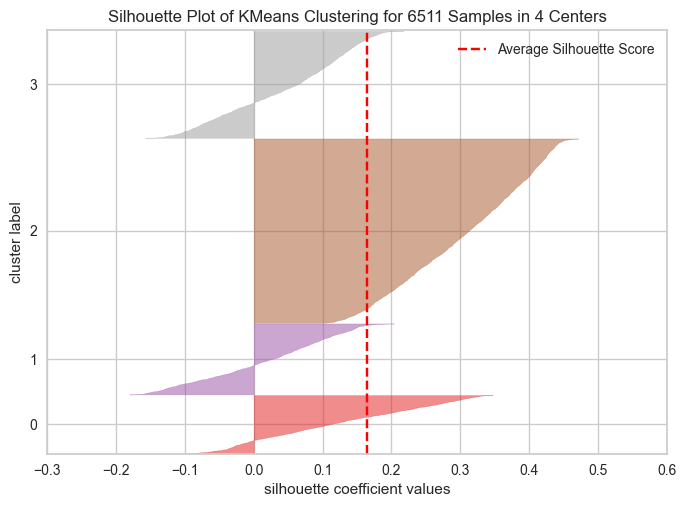

Número de componentes utilizado 25



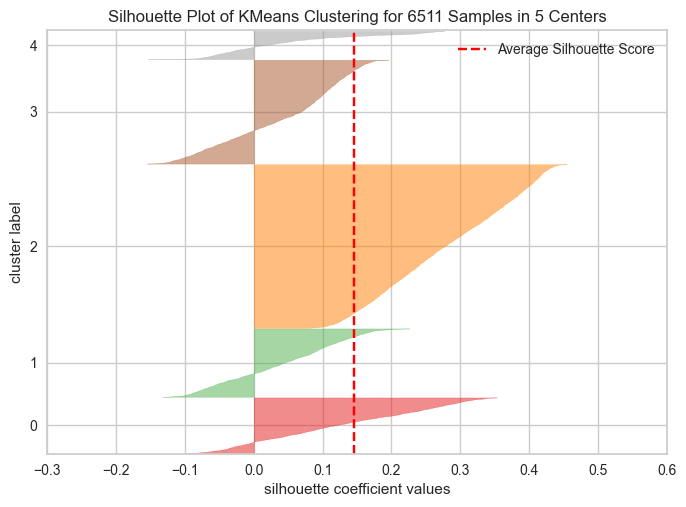

Número de componentes utilizado 25



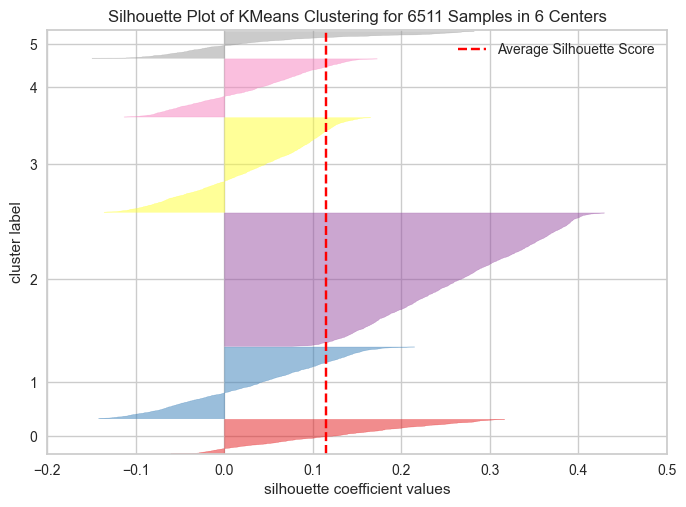

Número de componentes utilizado 26



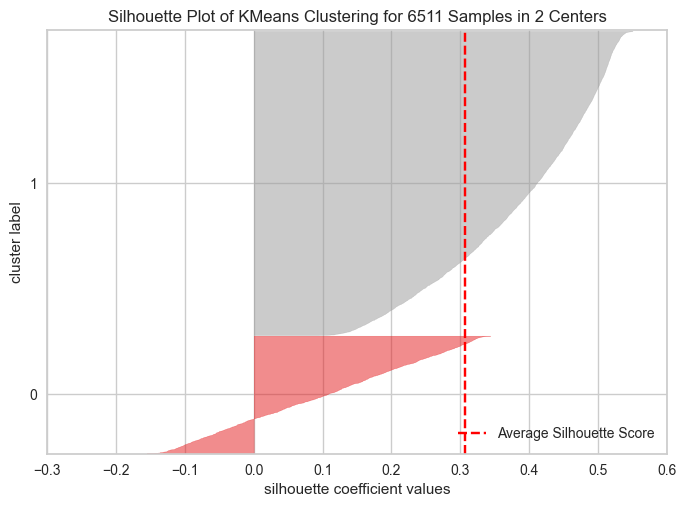

Número de componentes utilizado 26



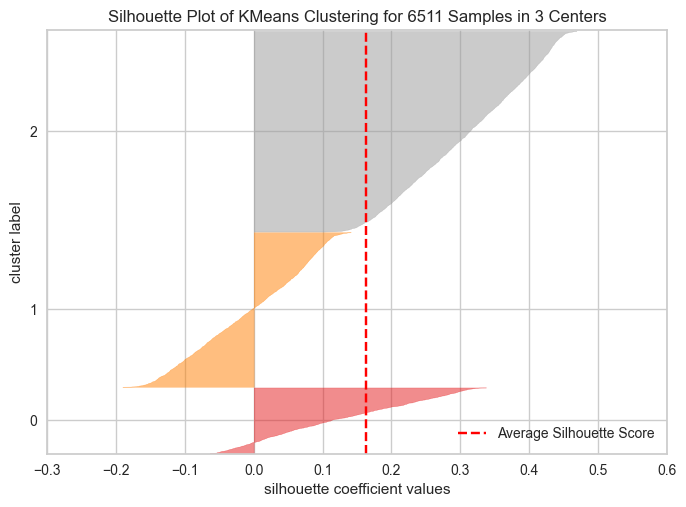

Número de componentes utilizado 26



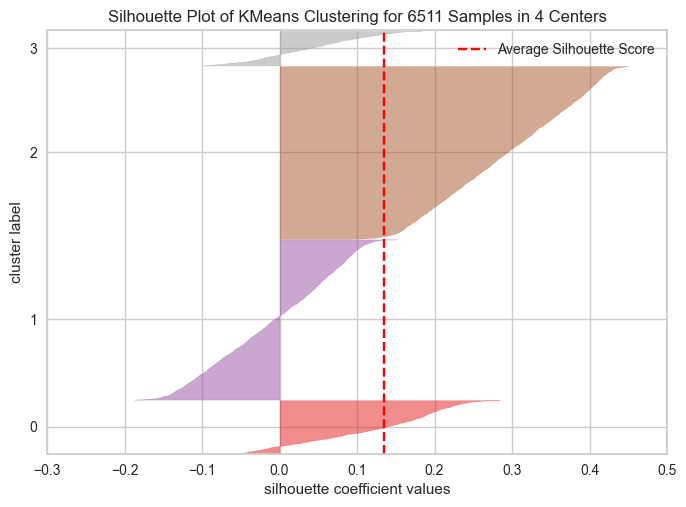

Número de componentes utilizado 26



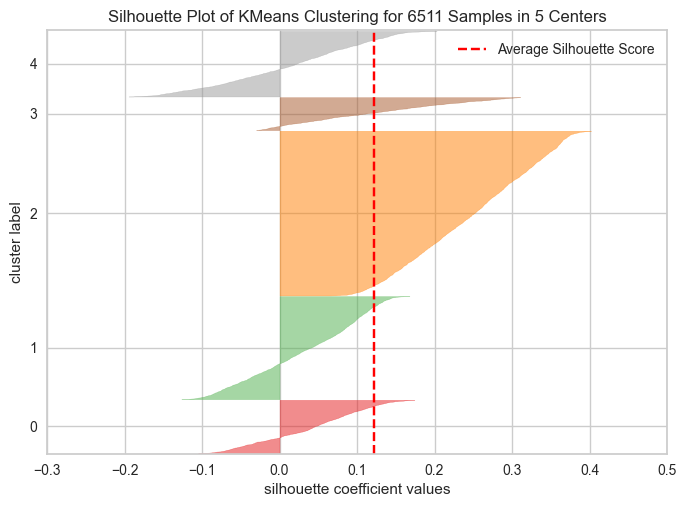

Número de componentes utilizado 26



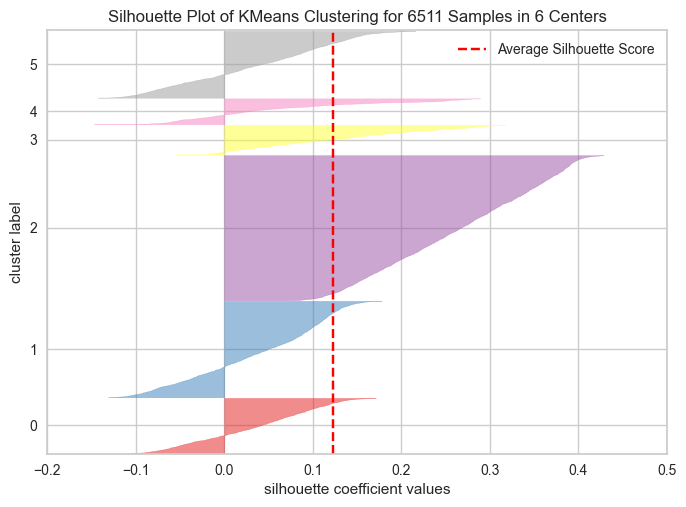

Número de componentes utilizado 27



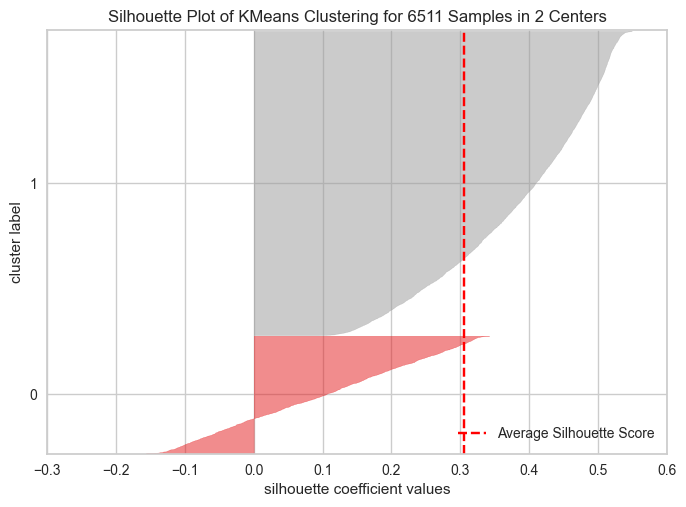

Número de componentes utilizado 27



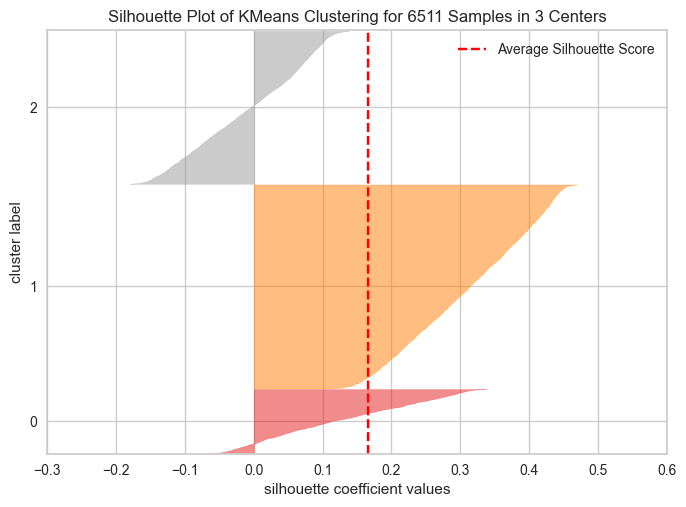

Número de componentes utilizado 27



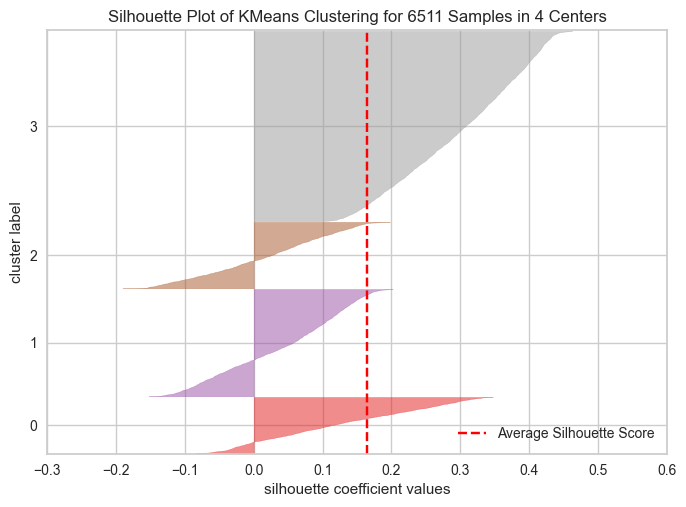

Número de componentes utilizado 27



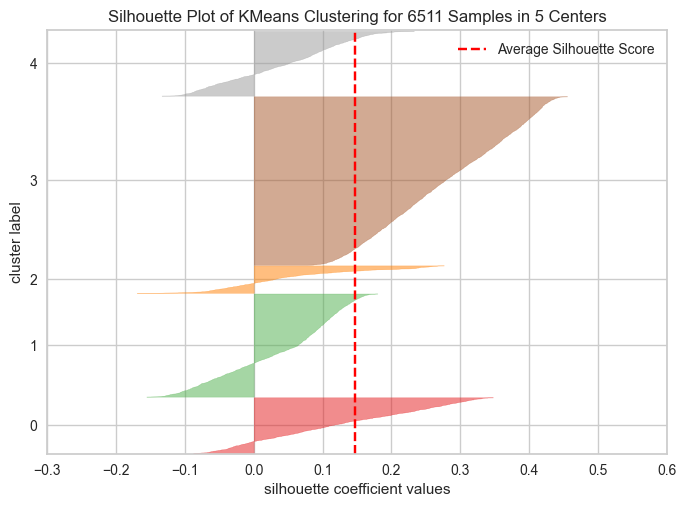

Número de componentes utilizado 27



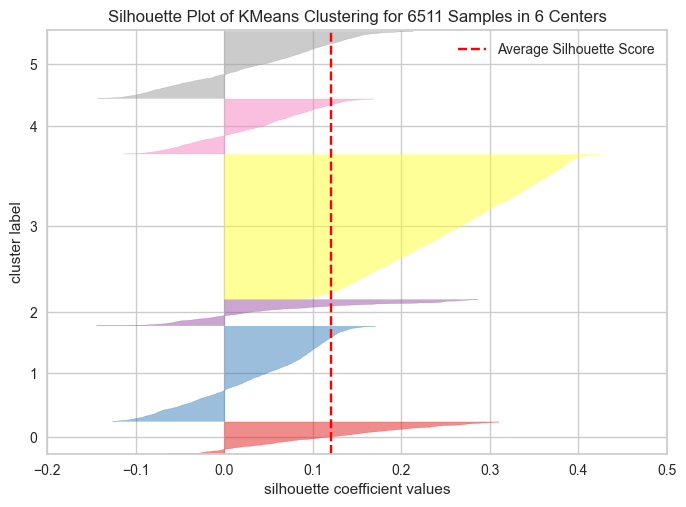

Número de componentes utilizado 28



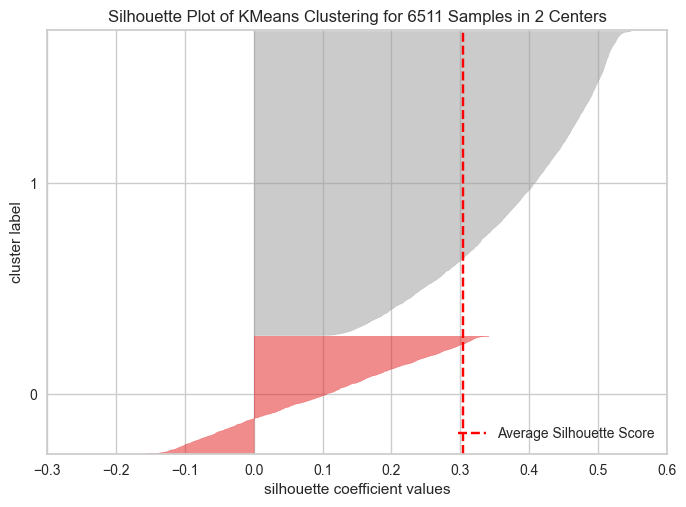

Número de componentes utilizado 28



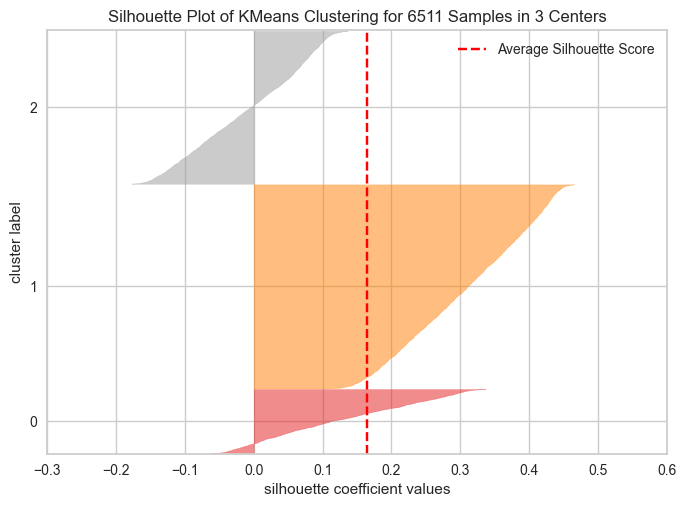

Número de componentes utilizado 28



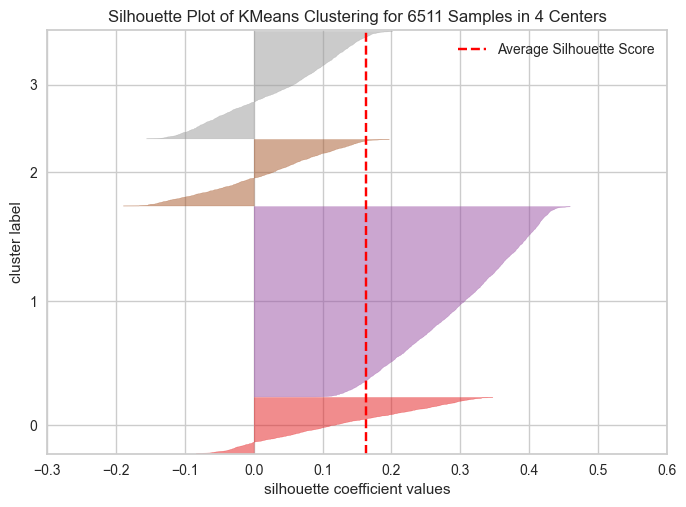

Número de componentes utilizado 28



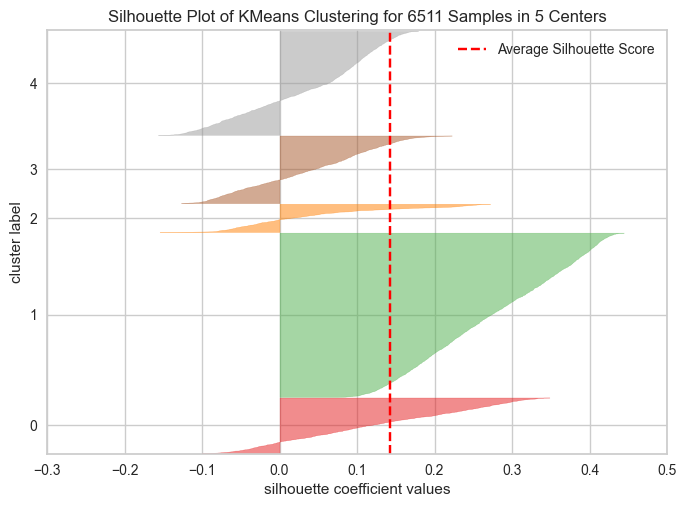

Número de componentes utilizado 28



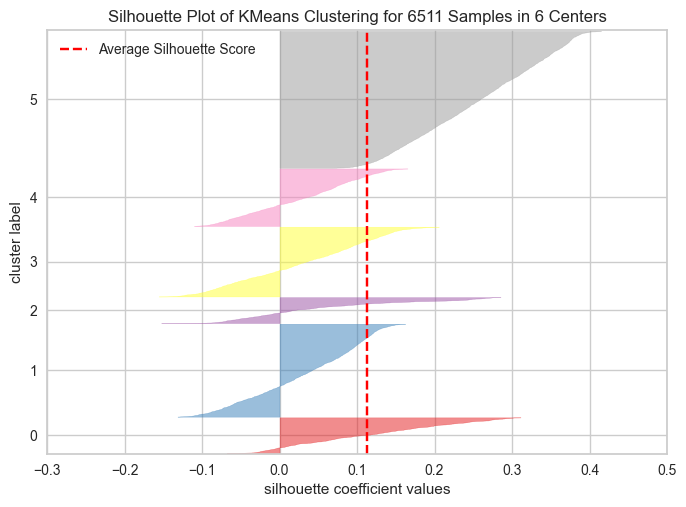

Número de componentes utilizado 29



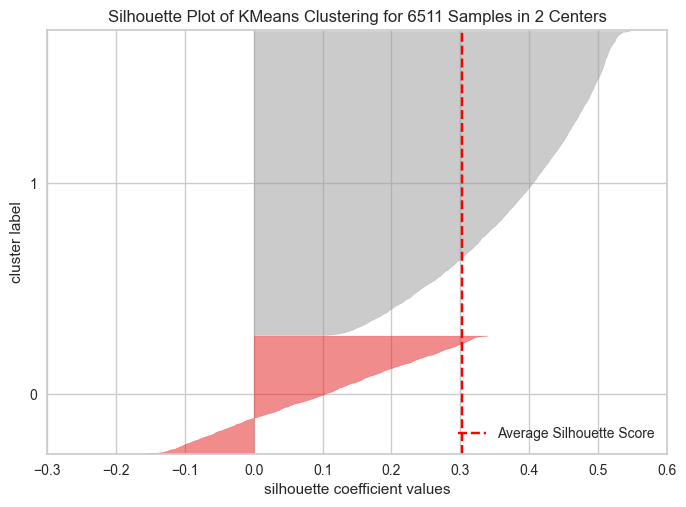

Número de componentes utilizado 29



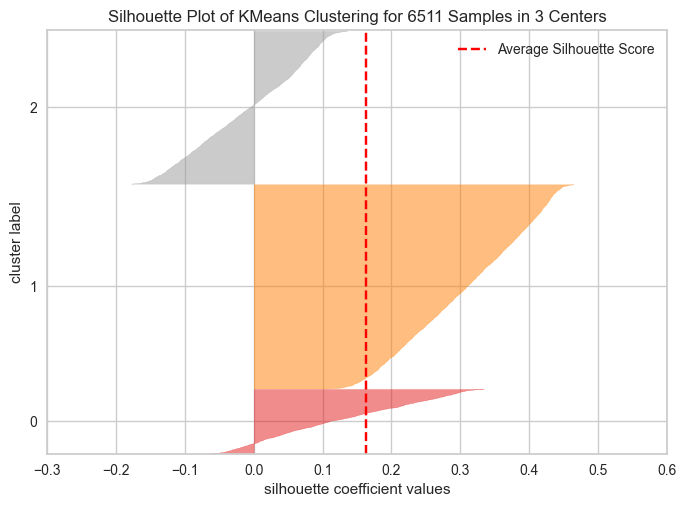

Número de componentes utilizado 29



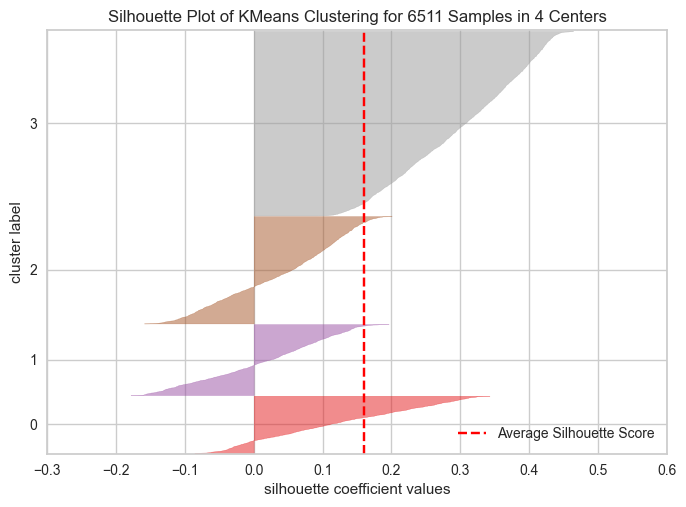

Número de componentes utilizado 29



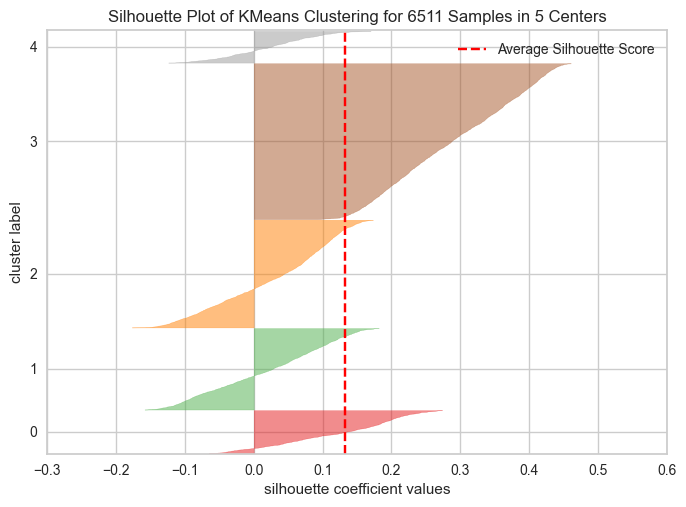

Número de componentes utilizado 29



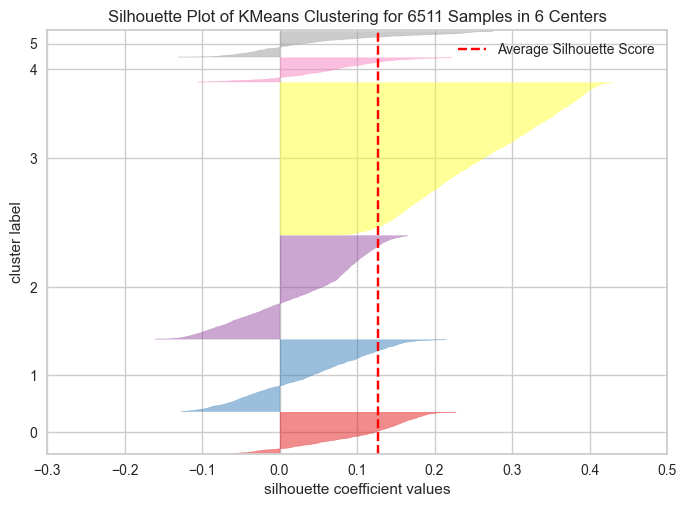

Número de componentes utilizado 30



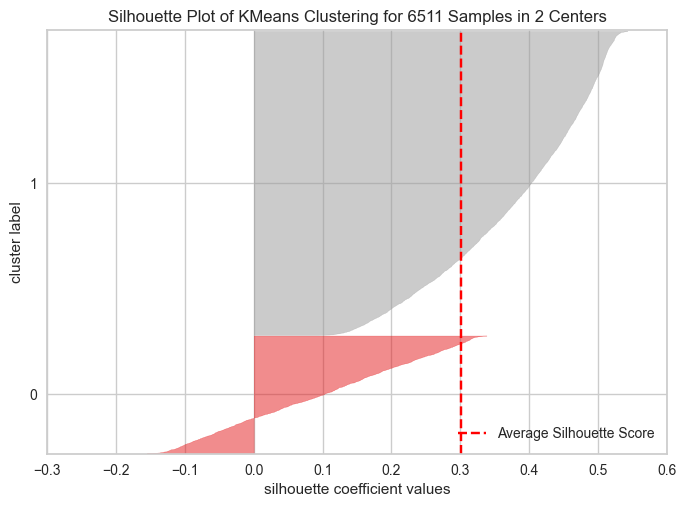

Número de componentes utilizado 30



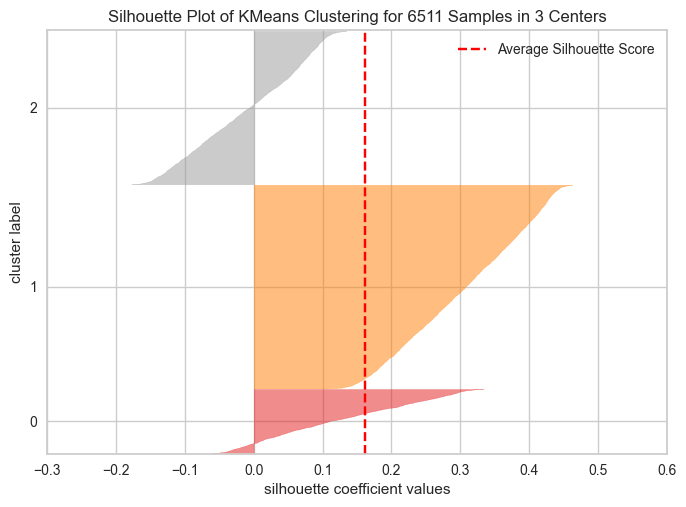

Número de componentes utilizado 30



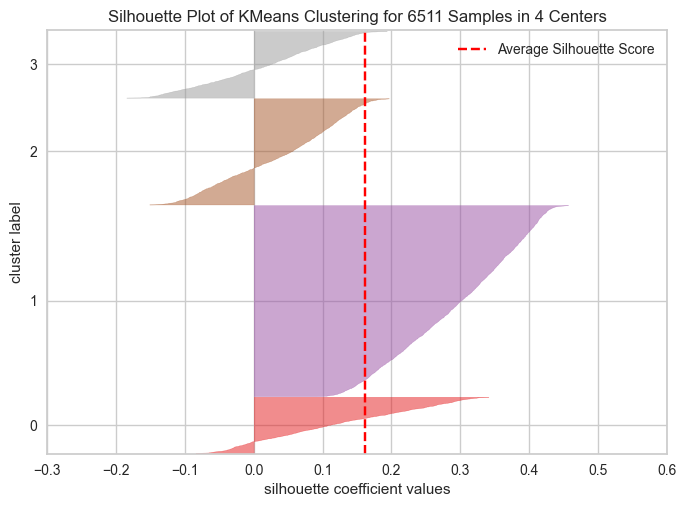

Número de componentes utilizado 30



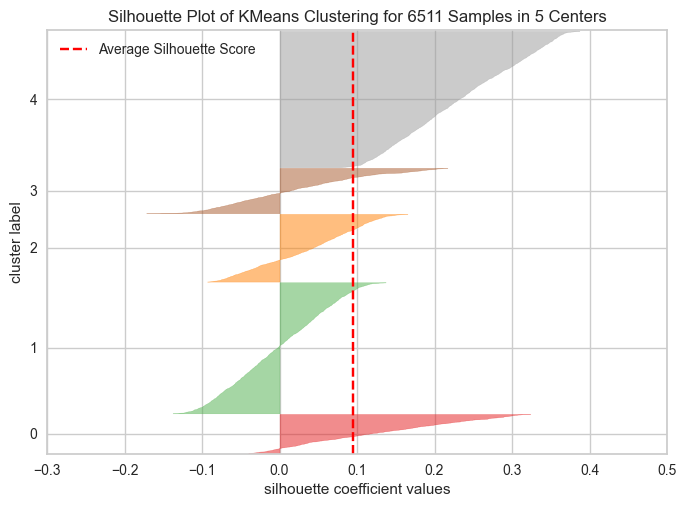

Número de componentes utilizado 30



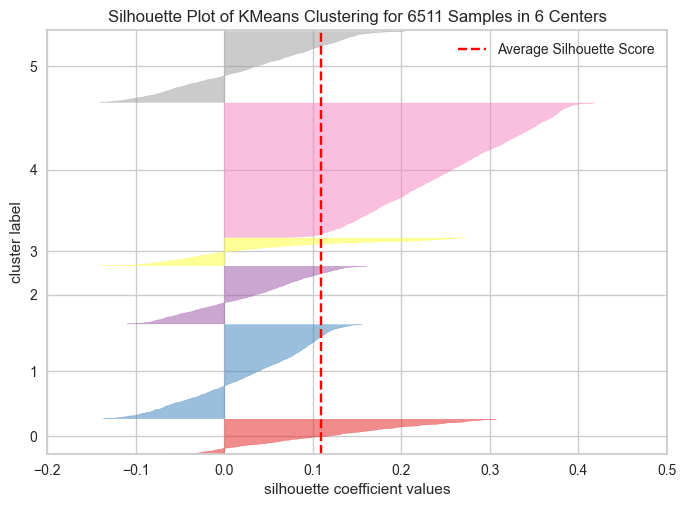

Número de componentes utilizado 31



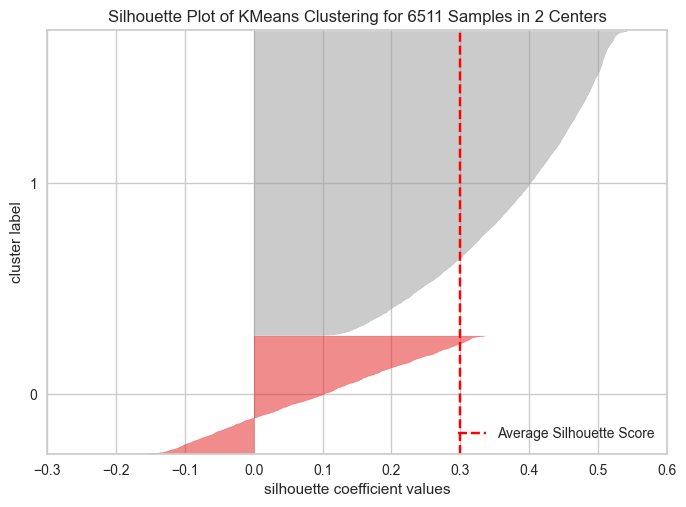

Número de componentes utilizado 31



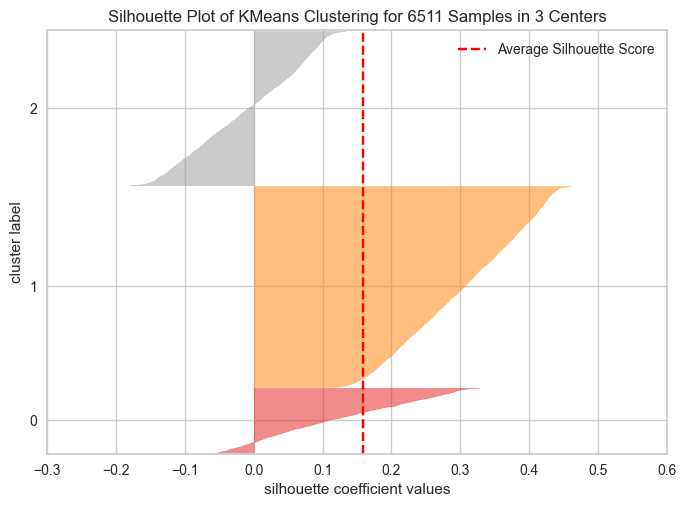

Número de componentes utilizado 31



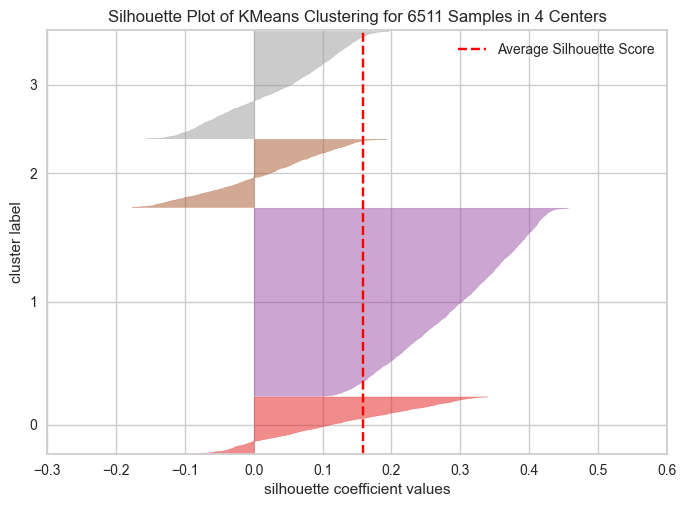

Número de componentes utilizado 31



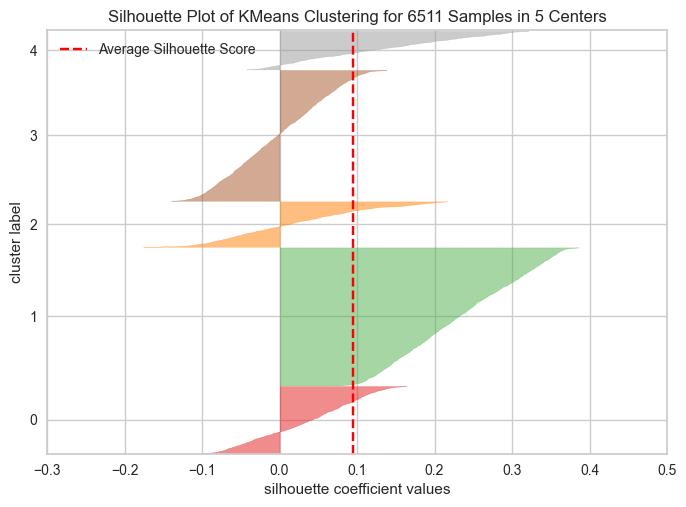

Número de componentes utilizado 31



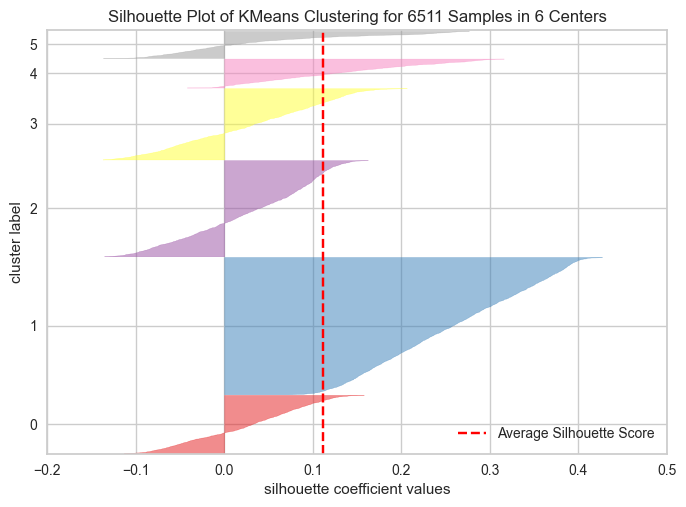

Número de componentes utilizado 32



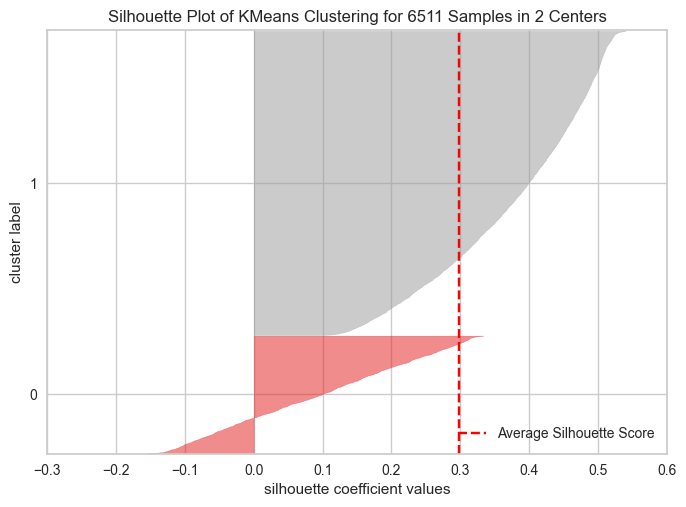

Número de componentes utilizado 32



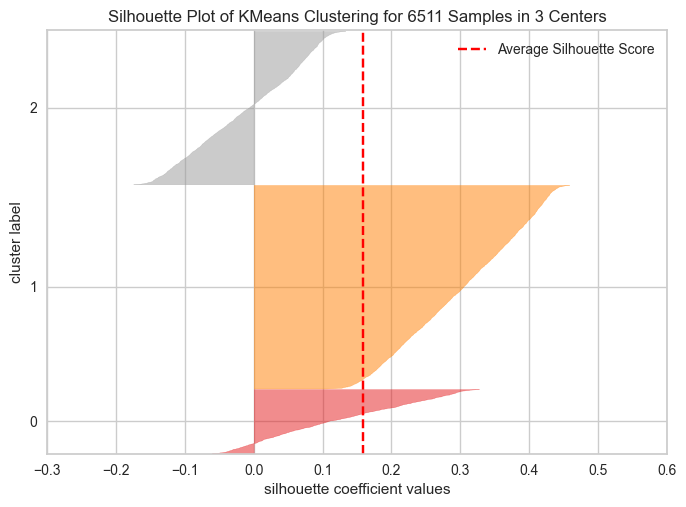

Número de componentes utilizado 32



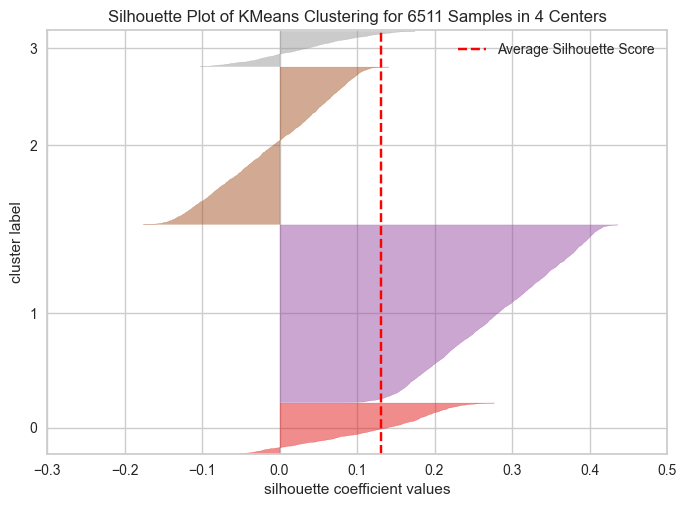

Número de componentes utilizado 32



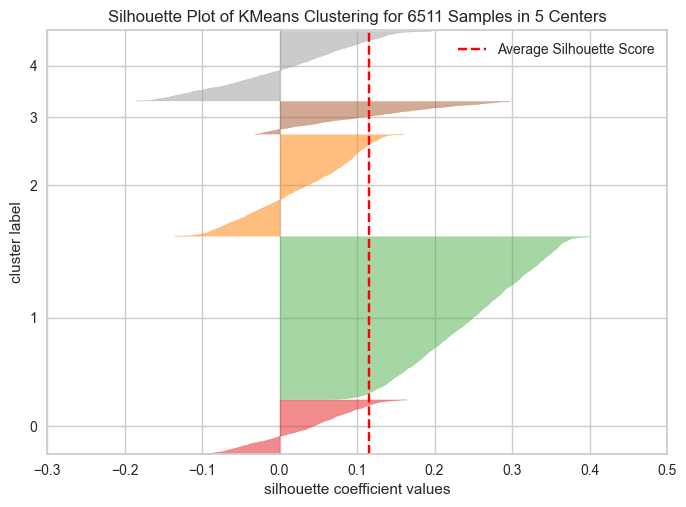

Número de componentes utilizado 32



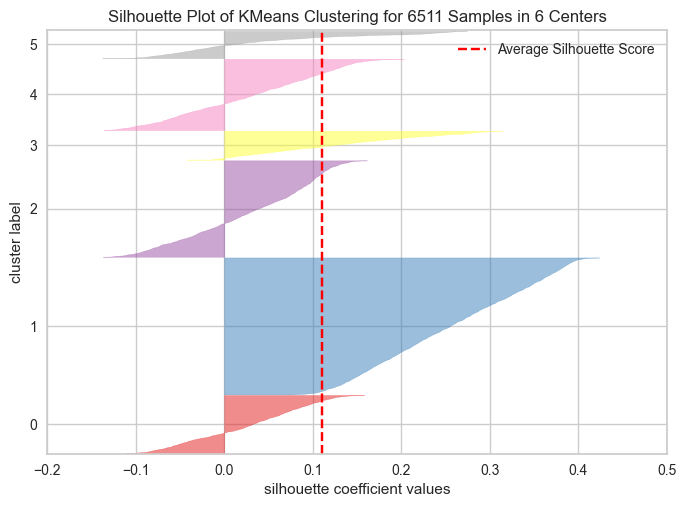

Número de componentes utilizado 33



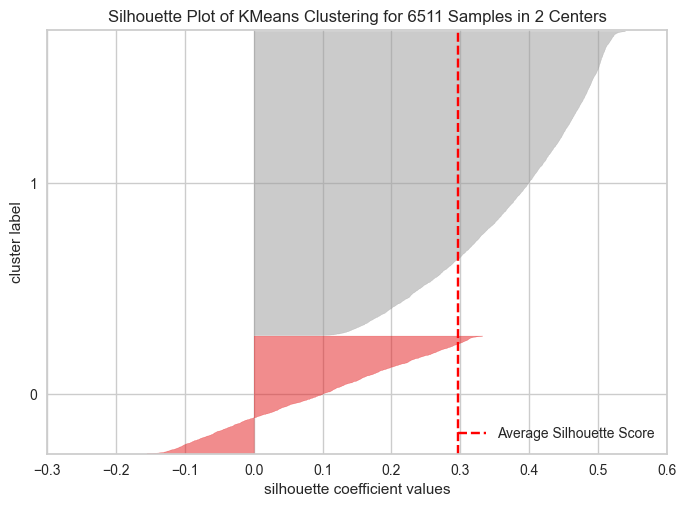

Número de componentes utilizado 33



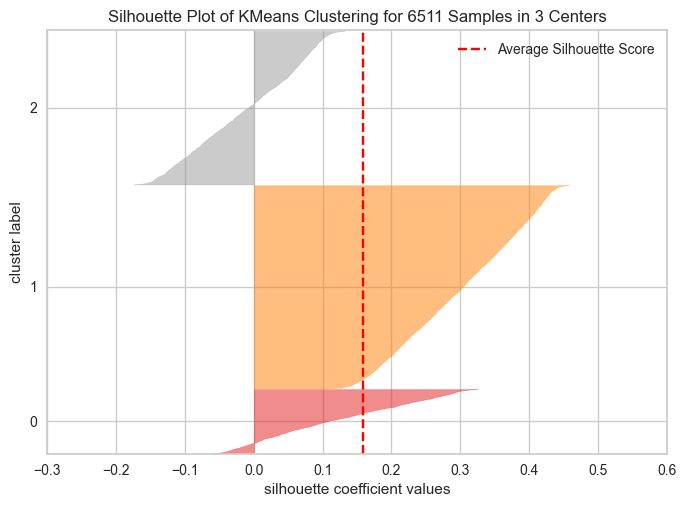

Número de componentes utilizado 33



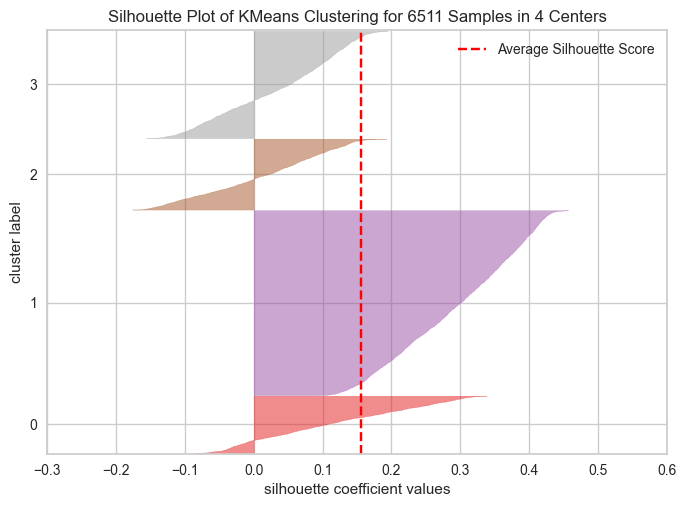

Número de componentes utilizado 33



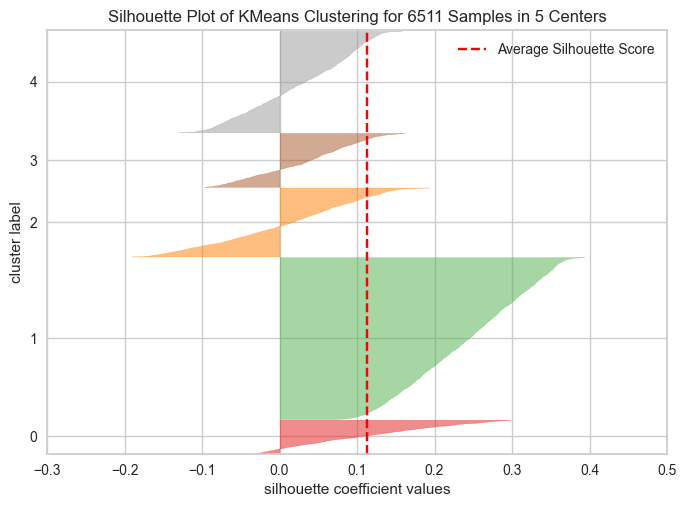

Número de componentes utilizado 33



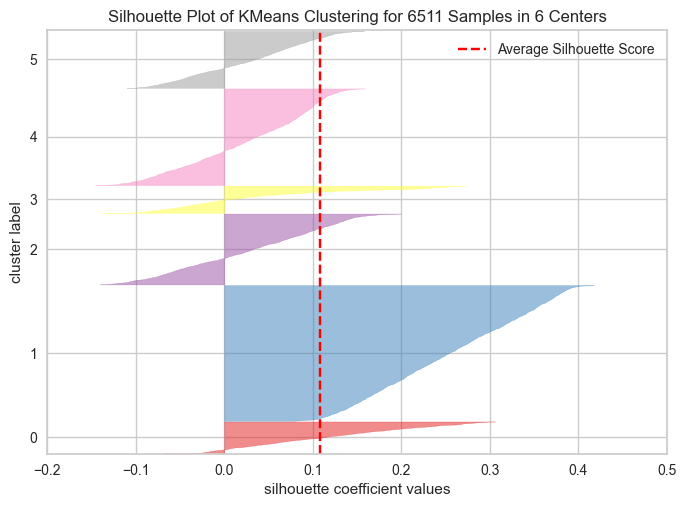

Número de componentes utilizado 34



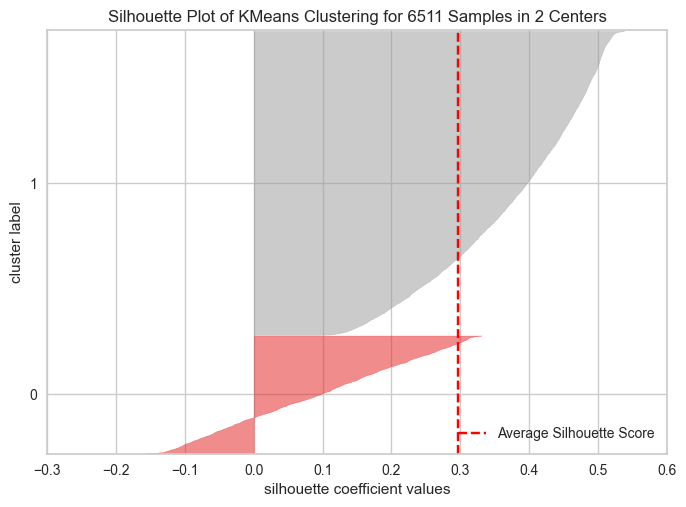

Número de componentes utilizado 34



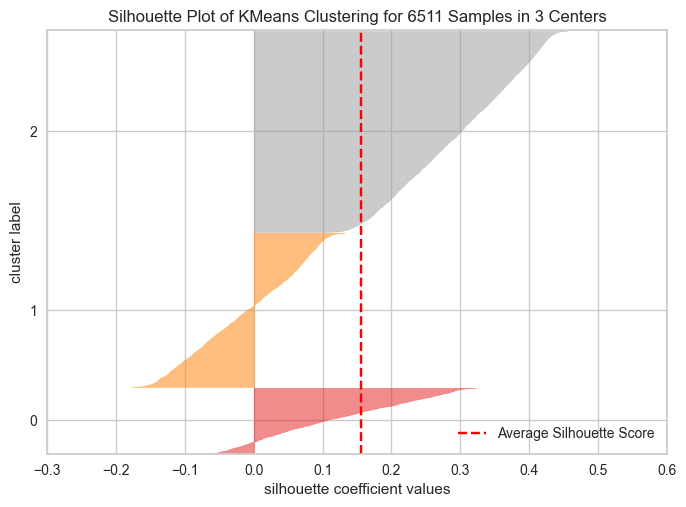

Número de componentes utilizado 34



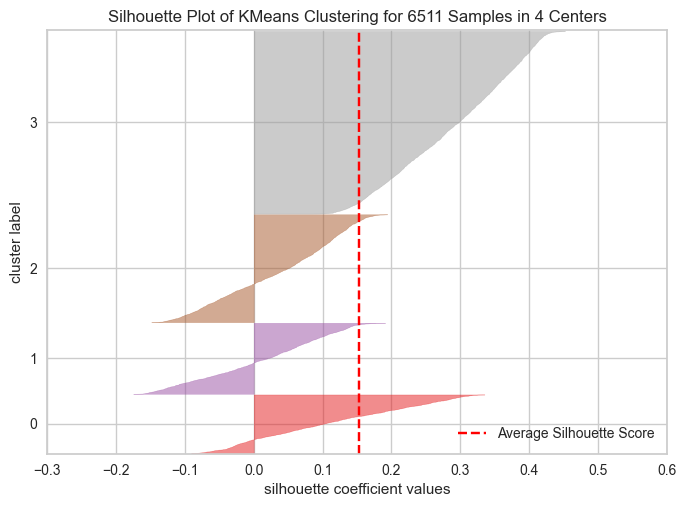

Número de componentes utilizado 34



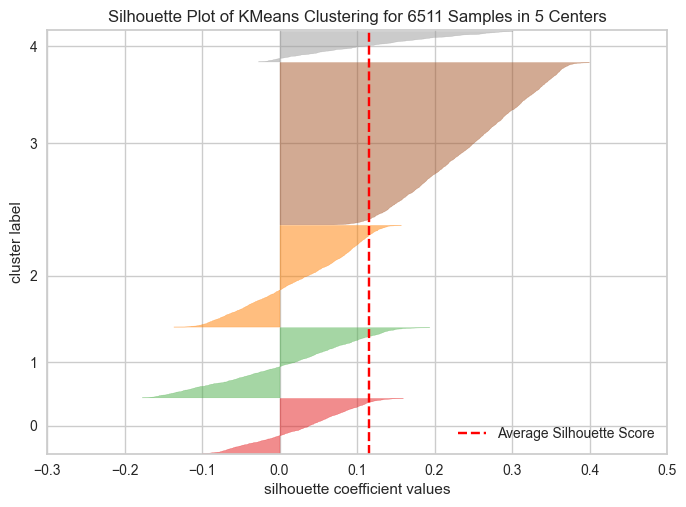

Número de componentes utilizado 34



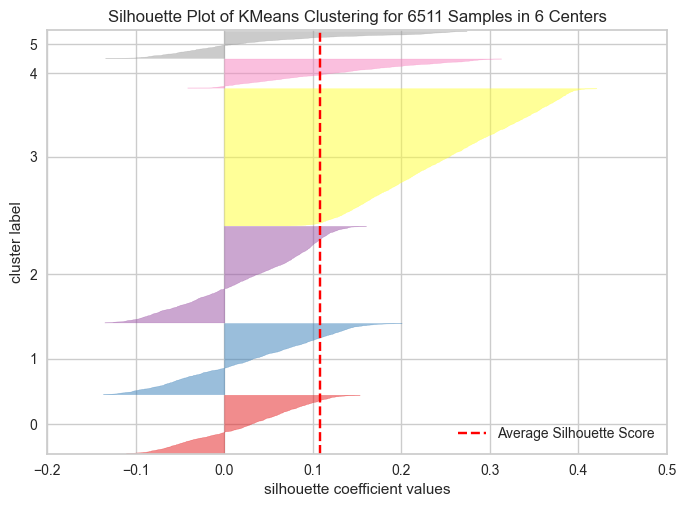

Número de componentes utilizado 35



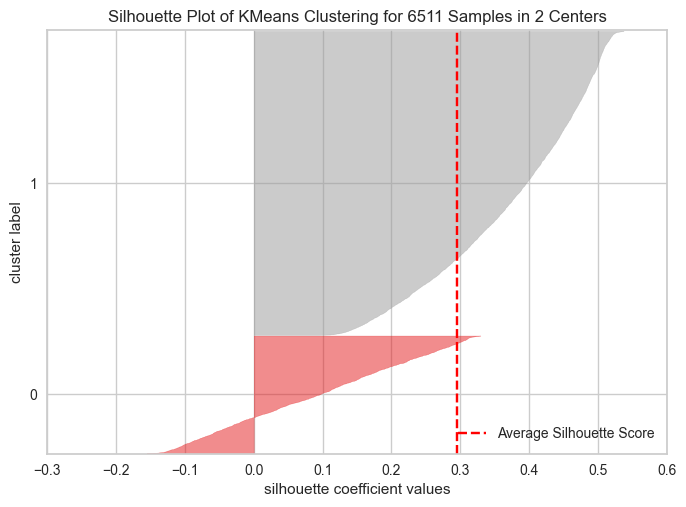

Número de componentes utilizado 35



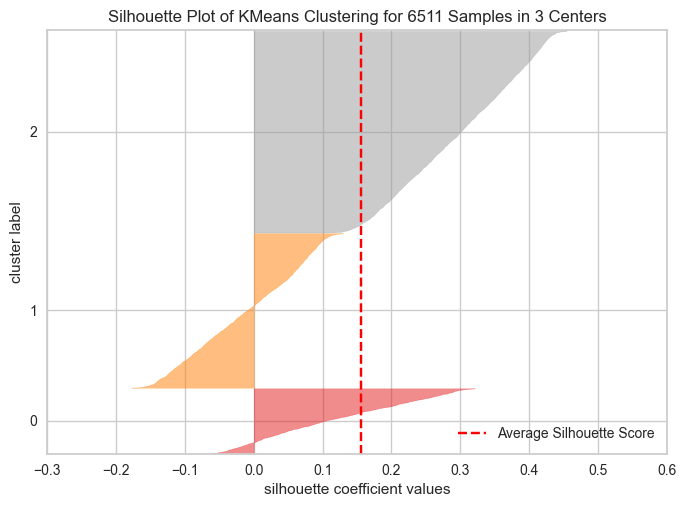

Número de componentes utilizado 35



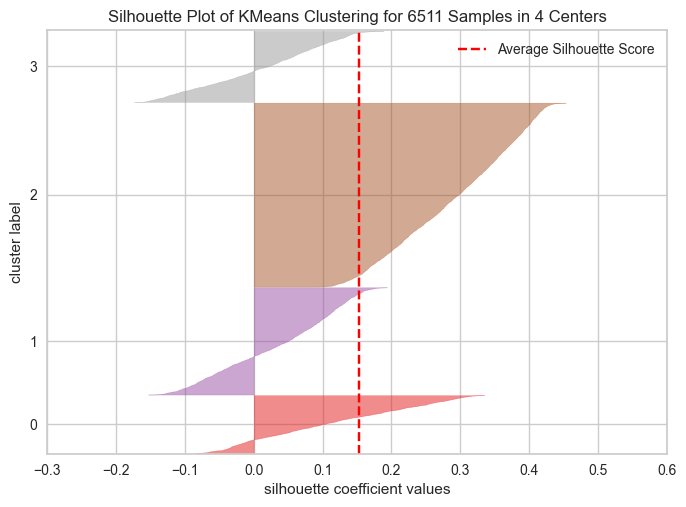

Número de componentes utilizado 35



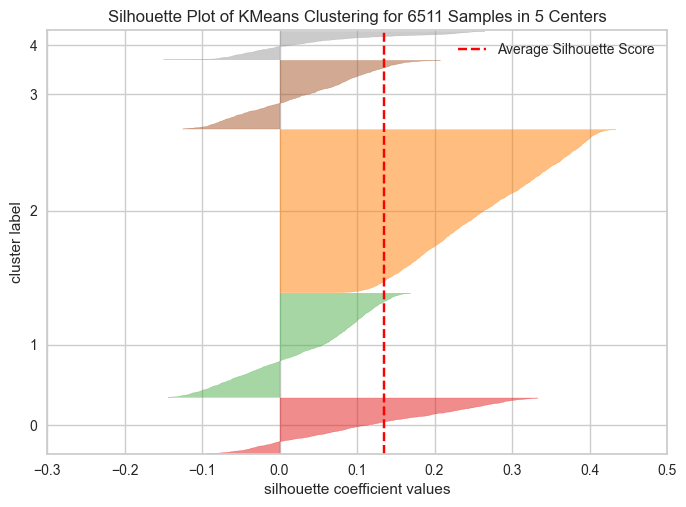

Número de componentes utilizado 35



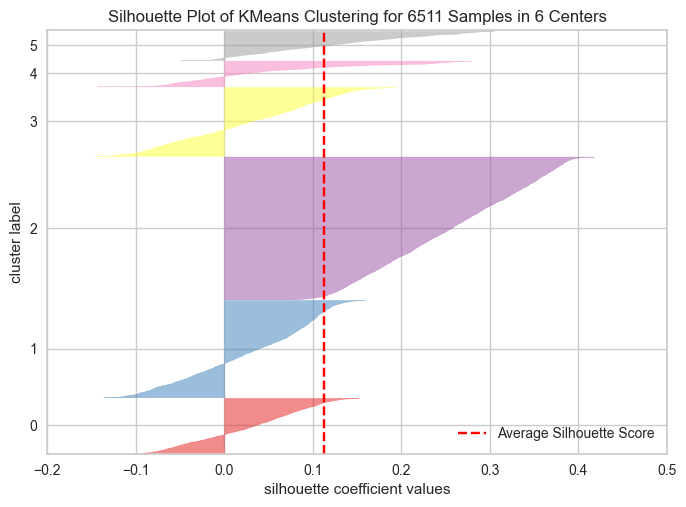

Número de componentes utilizado 36



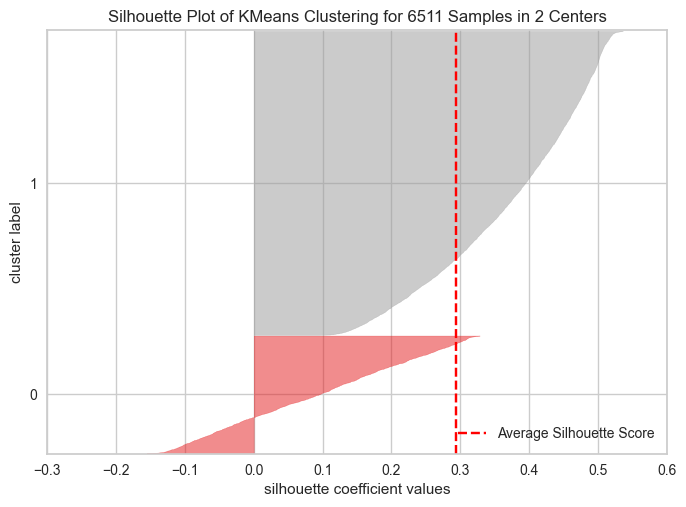

Número de componentes utilizado 36



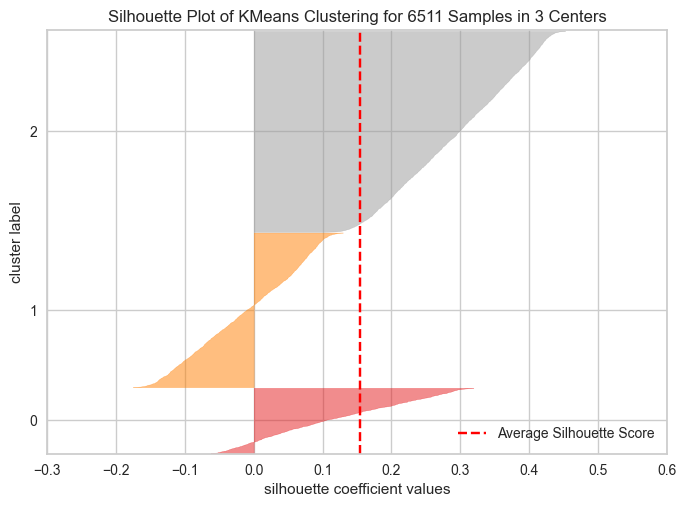

Número de componentes utilizado 36



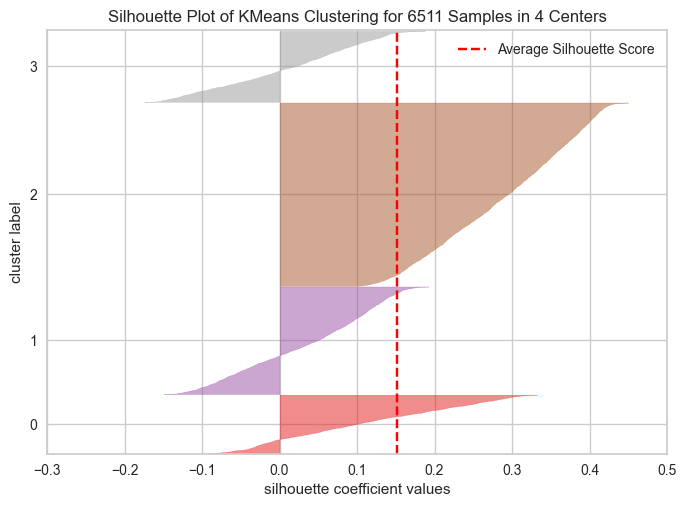

Número de componentes utilizado 36



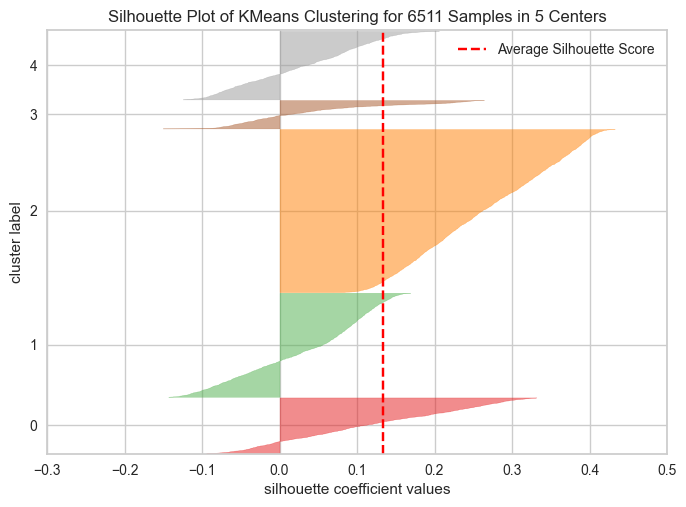

Número de componentes utilizado 36



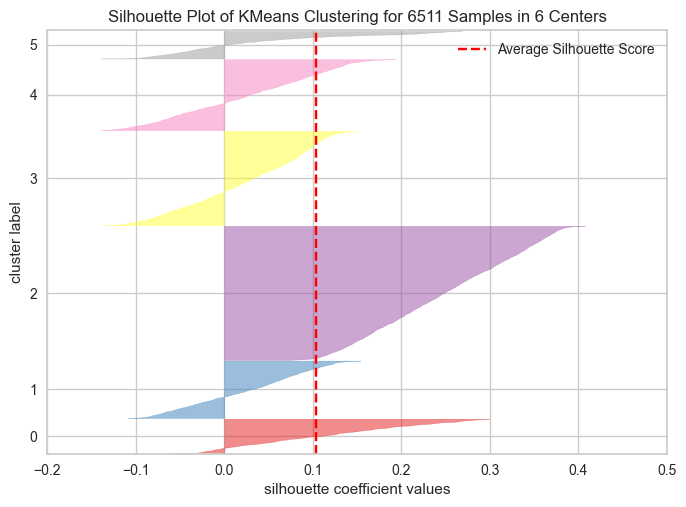

Número de componentes utilizado 37



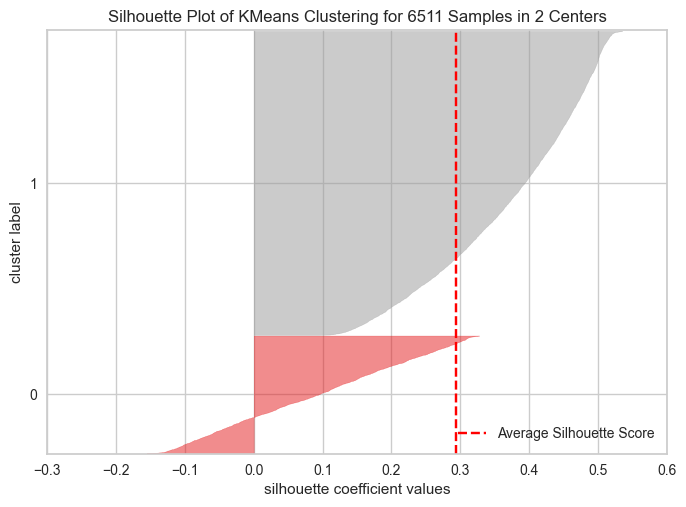

Número de componentes utilizado 37



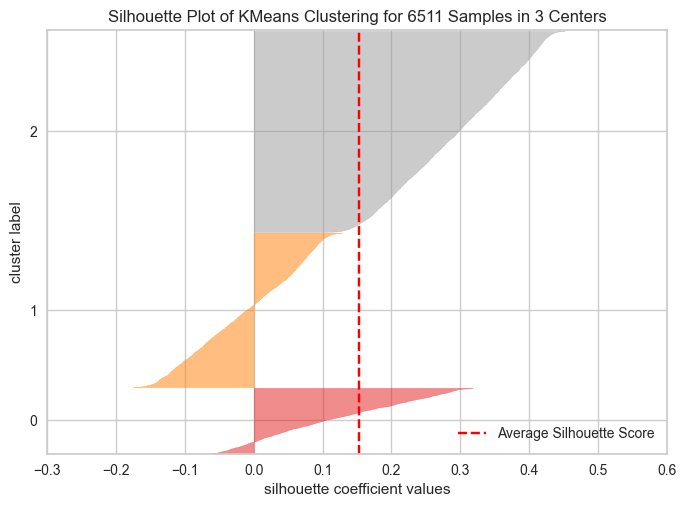

Número de componentes utilizado 37



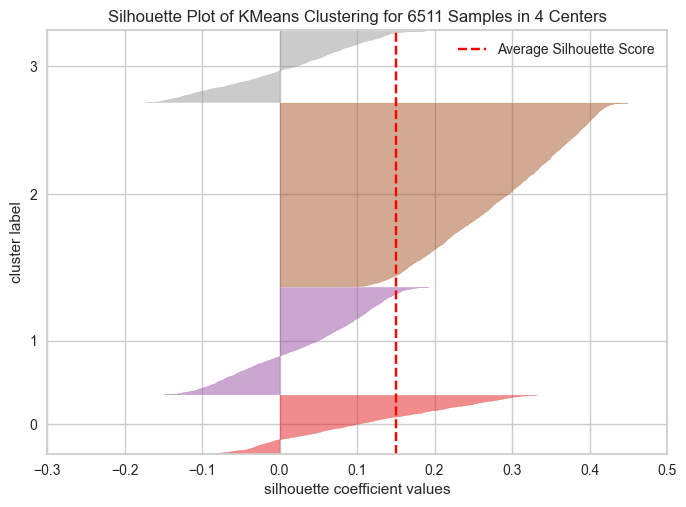

Número de componentes utilizado 37



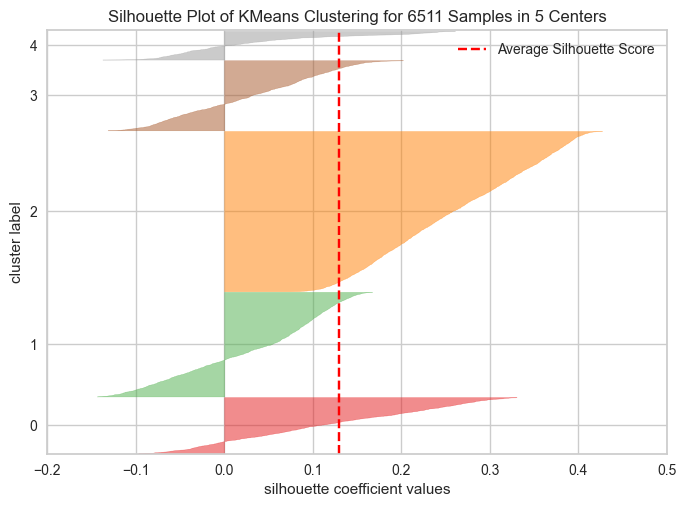

Número de componentes utilizado 37



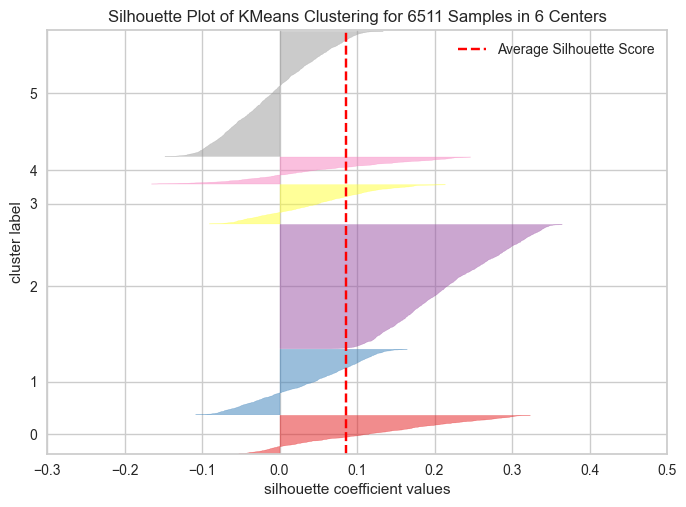

Número de componentes utilizado 38



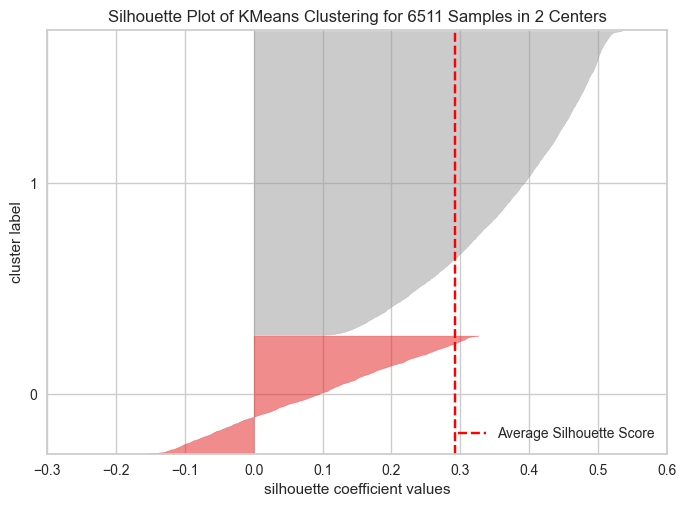

Número de componentes utilizado 38



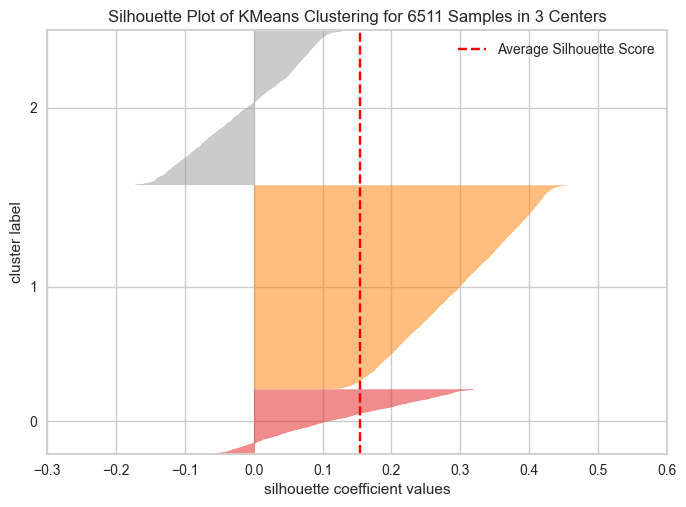

Número de componentes utilizado 38



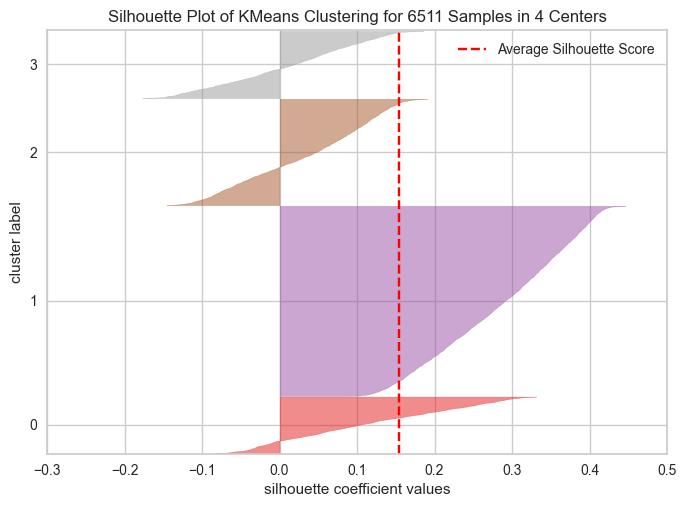

Número de componentes utilizado 38



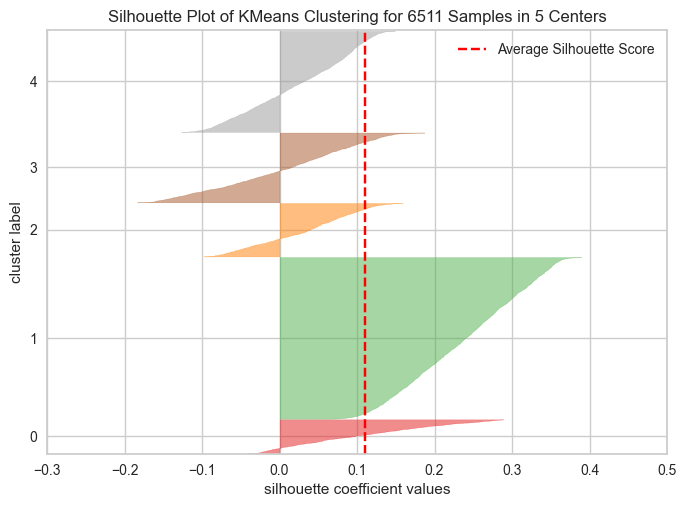

Número de componentes utilizado 38



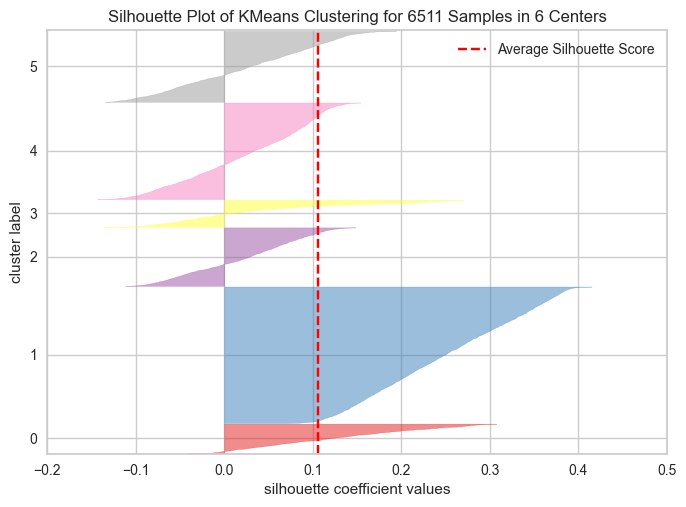

Número de componentes utilizado 39



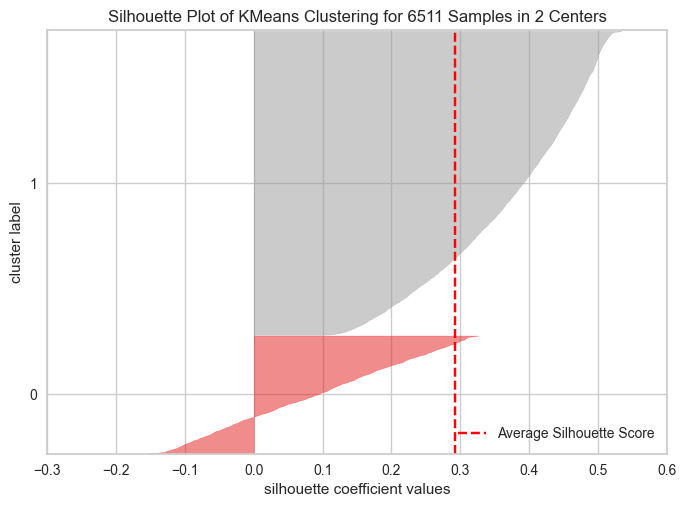

Número de componentes utilizado 39



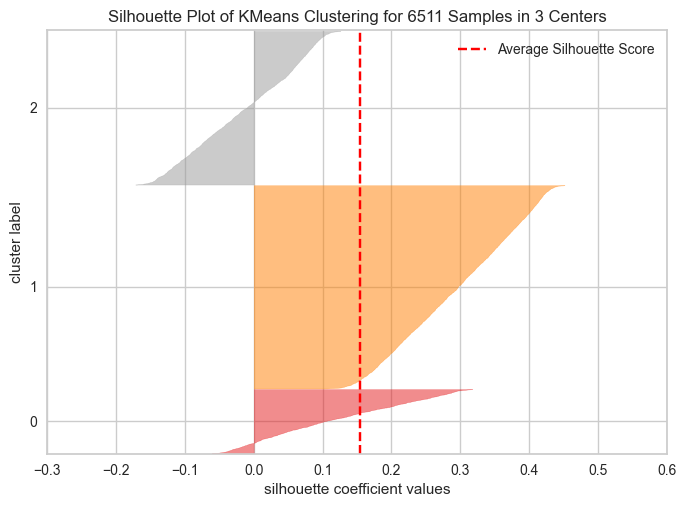

Número de componentes utilizado 39



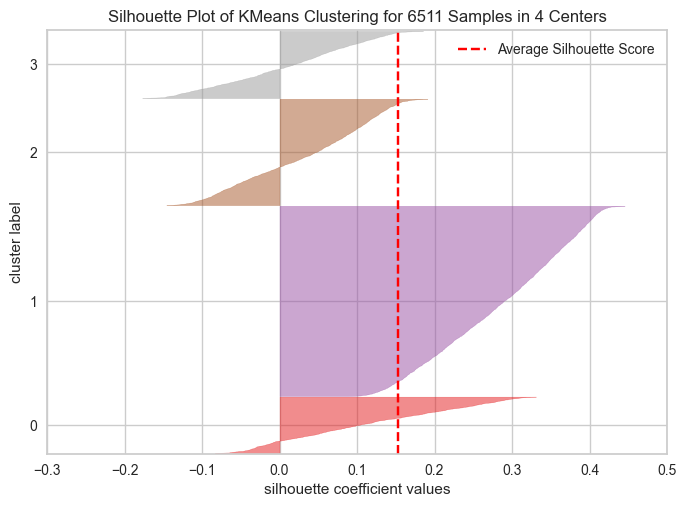

Número de componentes utilizado 39



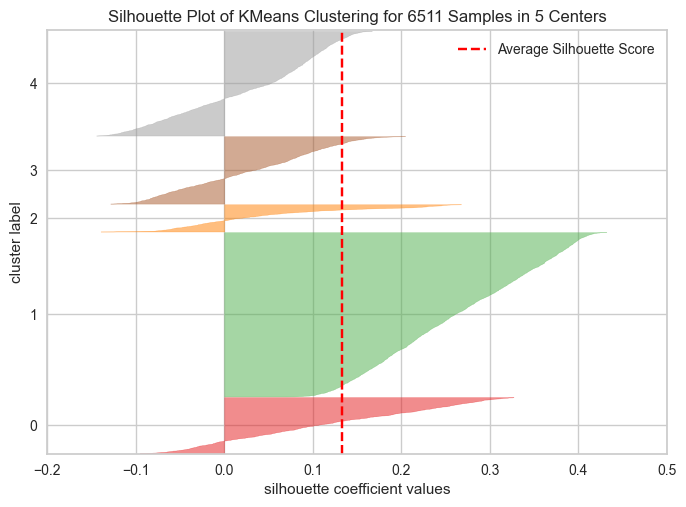

Número de componentes utilizado 39



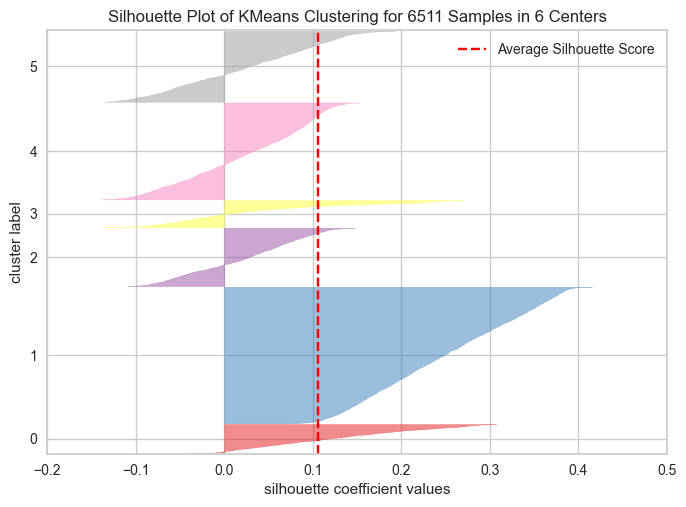

Número de componentes utilizado 40



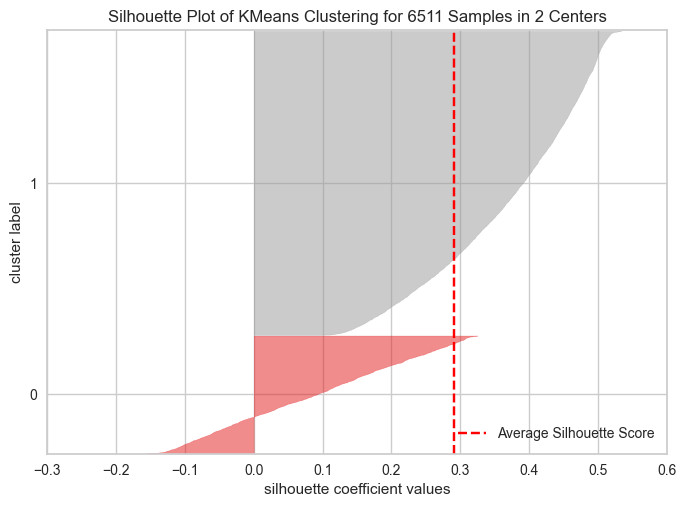

Número de componentes utilizado 40



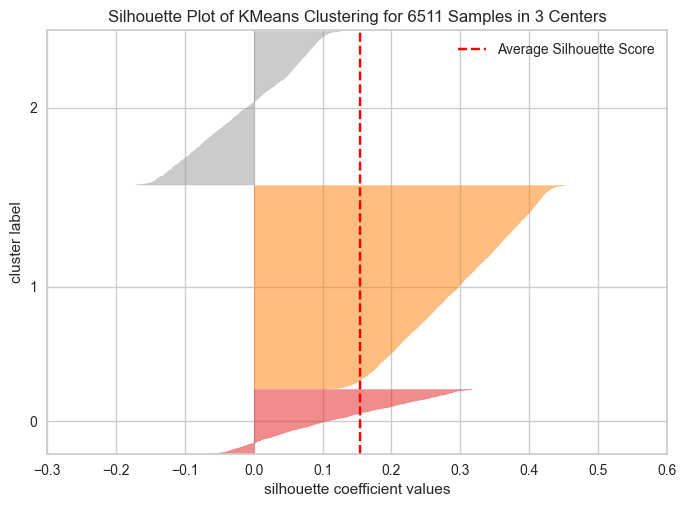

Número de componentes utilizado 40



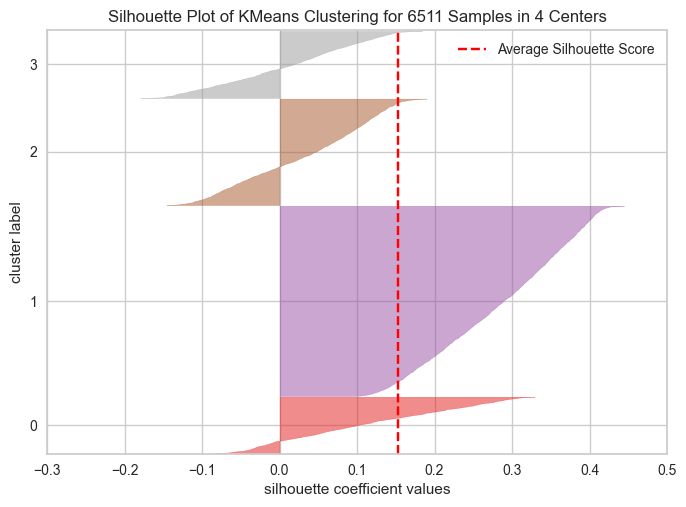

Número de componentes utilizado 40



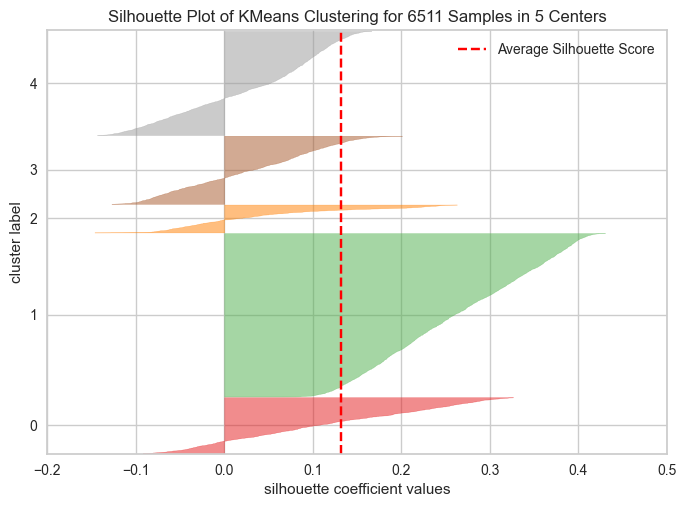

Número de componentes utilizado 40



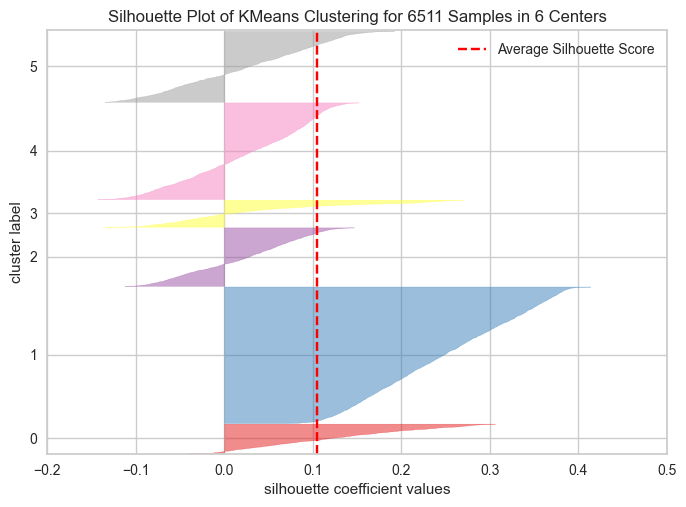

In [11]:
for numero_componentes in range(15, 41):
    scores_pca = criar_pca(numero_componentes)
    
    for numero_clusters in range(2, 7):
        plotar_analise_silhueta(numero_clusters, scores_pca, numero_componentes)